In [53]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')


In [54]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500

Symbol              Security             GICS Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4      ACN             Accenture  Information Technology   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                      GICS Sub-Industry    Headquarters Location  Date added  \
0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
2                 Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                         Biotechnology  North Chicago, Illinois  2012-12-31   
4        IT Consulting & Other Services          Dublin, Ireland  2011-07-06   
..                                  ...                      ...         ...   
498                         Restaurants     Louisville, Kentucky  1997-10-06   
499  Electronic Equipment & Instruments   Lincolnshire, Illinois  2019-12-23   
500               Health Care Equipment          Warsaw, Indiana  2001-08-07   
501                      Regional Banks     Salt Lake City, Utah  2001-06-22   
502                     Pharmaceuticals   Parsippany, New Jersey  2013-06-21   

         CIK      Founded  
0      66740         1902  
1      91142         1916  
2       1800         1888  
3    1551152  2013 (1888)  
4    1467373         1989  
..       ...          ...  
498  1041061         1997  
499   877212         1969  
500  1136869         1927  
501   109380         1873  
502  1555280         1952  

[503 rows x 8 columns]

In [55]:
sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')

In [56]:
symbols_list = sp500['Symbol'].unique().tolist()
symbols_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA'

In [57]:
end_date = '2023-09-27'

start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)

In [58]:
df = yf.download(tickers=symbols_list,
                 start=start_date,
                 end=end_date).stack()
df

[*********************100%%**********************]  503 of 503 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1443499200, endDate = 1695787200")


Price               Adj Close       Close        High         Low        Open  \
Date       Ticker                                                               
2015-09-29 A        31.534704   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361618   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684570   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674236   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644745   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     122.811577  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.231339   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048248  176.869995  178.449997  176.270004  176.580002   

Price                   Volume  
Date       Ticker               
2015-09-29 A         2252400.0  
           AAL       7478800.0  
           AAPL    293461600.0  
           ABBV     12842800.0  
           ABT      12287500.0  
...                        ...  
2023-09-26 YUM       1500600.0  
           ZBH       3610500.0  
           ZBRA       355400.0  
           ZION      1586100.0  
           ZTS       1463200.0  

[993179 rows x 6 columns]

In [59]:
df.stack()
df

Price               Adj Close       Close        High         Low        Open  \
Date       Ticker                                                               
2015-09-29 A        31.534704   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361618   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684570   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674236   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644745   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     122.811577  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.231339   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048248  176.869995  178.449997  176.270004  176.580002   

Price                   Volume  
Date       Ticker               
2015-09-29 A         2252400.0  
           AAL       7478800.0  
           AAPL    293461600.0  
           ABBV     12842800.0  
           ABT      12287500.0  
...                        ...  
2023-09-26 YUM       1500600.0  
           ZBH       3610500.0  
           ZBRA       355400.0  
           ZION      1586100.0  
           ZTS       1463200.0  

[993179 rows x 6 columns]

In [60]:
df.index.names = ['date','ticker']
df

Price               Adj Close       Close        High         Low        Open  \
date       ticker                                                               
2015-09-29 A        31.534704   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361618   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684570   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674236   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644745   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     122.811577  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.231339   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048248  176.869995  178.449997  176.270004  176.580002   

Price                   Volume  
date       ticker               
2015-09-29 A         2252400.0  
           AAL       7478800.0  
           AAPL    293461600.0  
           ABBV     12842800.0  
           ABT      12287500.0  
...                        ...  
2023-09-26 YUM       1500600.0  
           ZBH       3610500.0  
           ZBRA       355400.0  
           ZION      1586100.0  
           ZTS       1463200.0  

[993179 rows x 6 columns]

In [61]:
df.columns = df.columns.str.lower()
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534704   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361618   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684570   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674236   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644745   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     122.811577  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.231339   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048248  176.869995  178.449997  176.270004  176.580002   

Price                   volume  
date       ticker               
2015-09-29 A         2252400.0  
           AAL       7478800.0  
           AAPL    293461600.0  
           ABBV     12842800.0  
           ABT      12287500.0  
...                        ...  
2023-09-26 YUM       1500600.0  
           ZBH       3610500.0  
           ZBRA       355400.0  
           ZION      1586100.0  
           ZTS       1463200.0  

[993179 rows x 6 columns]

**Calculate features and technical indicators for each stock.**


*   Garman-Klass Volatility
*   RSI
*   Bollinger Bands
*   ATR
*   MACD
*   Dollar Volume





In [62]:
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)

df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534704   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361618   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684570   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674236   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644745   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     122.811577  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.231339   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048248  176.869995  178.449997  176.270004  176.580002   

Price                   volume  garman_klass_vol  
date       ticker                                 
2015-09-29 A         2252400.0         -0.000926  
           AAL       7478800.0         -0.000443  
           AAPL    293461600.0         -0.005572  
           ABBV     12842800.0         -0.051964  
           ABT      12287500.0         -0.008803  
...                        ...               ...  
2023-09-26 YUM       1500600.0          0.000002  
           ZBH       3610500.0          0.000161  
           ZBRA       355400.0          0.000133  
           ZION      1586100.0          0.000188  
           ZTS       1463200.0          0.000072  

[993179 rows x 7 columns]

In [63]:
!pip install pandas_ta
import pandas_ta

In [64]:
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534704   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361618   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684570   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674236   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644745   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     122.811577  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.231339   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048248  176.869995  178.449997  176.270004  176.580002   

Price                   volume  garman_klass_vol        rsi  
date       ticker                                            
2015-09-29 A         2252400.0         -0.000926        NaN  
           AAL       7478800.0         -0.000443        NaN  
           AAPL    293461600.0         -0.005572        NaN  
           ABBV     12842800.0         -0.051964        NaN  
           ABT      12287500.0         -0.008803        NaN  
...                        ...               ...        ...  
2023-09-26 YUM       1500600.0          0.000002  36.057165  
           ZBH       3610500.0          0.000161  31.893251  
           ZBRA       355400.0          0.000133  29.494977  
           ZION      1586100.0          0.000188  46.707766  
           ZTS       1463200.0          0.000072  42.623479  

[993179 rows x 8 columns]

<Axes: xlabel='date'>

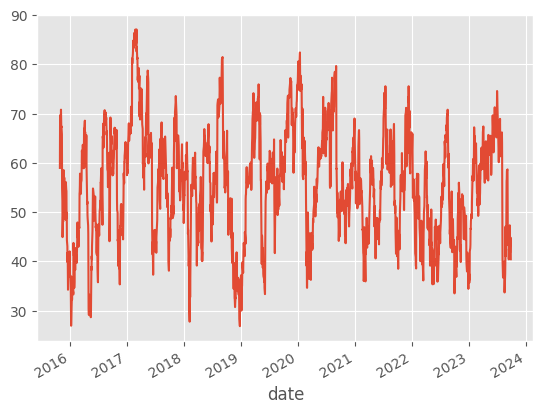

In [65]:
df.xs('AAPL',level=1)['rsi'].plot()

In [66]:
 pandas_ta.bbands(close=df.xs('AAPL',level=1)['adj close'], lenght=20)

BBL_5_2.0   BBM_5_2.0   BBU_5_2.0  BBB_5_2.0  BBP_5_2.0
date                                                                
2015-09-29         NaN         NaN         NaN        NaN        NaN
2015-09-30         NaN         NaN         NaN        NaN        NaN
2015-10-01         NaN         NaN         NaN        NaN        NaN
2015-10-02         NaN         NaN         NaN        NaN        NaN
2015-10-05   24.622749   24.901857   25.180965   2.241664   0.808157
...                ...         ...         ...        ...        ...
2023-09-20  173.049447  176.198737  179.348026   3.574702   0.315358
2023-09-21  172.011060  175.837671  179.664282   4.352436   0.191909
2023-09-22  171.904908  175.793787  179.682666   4.424365   0.312772
2023-09-25  171.920582  175.416766  178.912951   3.986146   0.529671
2023-09-26  171.131915  173.998447  176.864978   3.294893   0.066802

[2012 rows x 5 columns]

In [67]:
df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])

df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])

df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])

df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534704   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361618   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684570   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674236   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644745   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     122.811577  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.231339   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048248  176.869995  178.449997  176.270004  176.580002   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.000926        NaN       NaN   
           AAL       7478800.0         -0.000443        NaN       NaN   
           AAPL    293461600.0         -0.005572        NaN       NaN   
           ABBV     12842800.0         -0.051964        NaN       NaN   
           ABT      12287500.0         -0.008803        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 YUM       1500600.0          0.000002  36.057165  4.816569   
           ZBH       3610500.0          0.000161  31.893251  4.749948   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZION      1586100.0          0.000188  46.707766  3.517162   
           ZTS       1463200.0          0.000072  42.623479  5.158939   

Price                bb_mid   bb_high  
date       ticker                      
2015-09-29 A            NaN       NaN  
           AAL          NaN       NaN  
           AAPL         NaN       NaN  
           ABBV         NaN       NaN  
           ABT          NaN       NaN  
...                     ...       ...  
2023-09-26 YUM     4.846536  4.876502  
           ZBH     4.789615  4.829283  
           ZBRA    5.539167  5.677342  
           ZION    3.572582  3.628002  
           ZTS     5.217753  5.276568  

[993179 rows x 11 columns]

In [68]:
def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14)
    return atr.sub(atr.mean()).div(atr.std()) #Normalize the data

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

df


Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534704   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361618   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684570   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674236   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644745   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     122.811577  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.231339   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048248  176.869995  178.449997  176.270004  176.580002   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.000926        NaN       NaN   
           AAL       7478800.0         -0.000443        NaN       NaN   
           AAPL    293461600.0         -0.005572        NaN       NaN   
           ABBV     12842800.0         -0.051964        NaN       NaN   
           ABT      12287500.0         -0.008803        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 YUM       1500600.0          0.000002  36.057165  4.816569   
           ZBH       3610500.0          0.000161  31.893251  4.749948   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZION      1586100.0          0.000188  46.707766  3.517162   
           ZTS       1463200.0          0.000072  42.623479  5.158939   

Price                bb_mid   bb_high       atr  
date       ticker                                
2015-09-29 A            NaN       NaN       NaN  
           AAL          NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN  
           ABT          NaN       NaN       NaN  
...                     ...       ...       ...  
2023-09-26 YUM     4.846536  4.876502  0.142547  
           ZBH     4.789615  4.829283 -0.381708  
           ZBRA    5.539167  5.677342 -0.057389  
           ZION    3.572582  3.628002 -0.161699  
           ZTS     5.217753  5.276568  0.651515  

[993179 rows x 12 columns]

In [69]:
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534704   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361618   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684570   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674236   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644745   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     122.811577  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.231339   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048248  176.869995  178.449997  176.270004  176.580002   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.000926        NaN       NaN   
           AAL       7478800.0         -0.000443        NaN       NaN   
           AAPL    293461600.0         -0.005572        NaN       NaN   
           ABBV     12842800.0         -0.051964        NaN       NaN   
           ABT      12287500.0         -0.008803        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 YUM       1500600.0          0.000002  36.057165  4.816569   
           ZBH       3610500.0          0.000161  31.893251  4.749948   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZION      1586100.0          0.000188  46.707766  3.517162   
           ZTS       1463200.0          0.000072  42.623479  5.158939   

Price                bb_mid   bb_high       atr      macd  
date       ticker                                          
2015-09-29 A            NaN       NaN       NaN       NaN  
           AAL          NaN       NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...  
2023-09-26 YUM     4.846536  4.876502  0.142547 -1.363695  
           ZBH     4.789615  4.829283 -0.381708 -0.881067  
           ZBRA    5.539167  5.677342 -0.057389 -1.600791  
           ZION    3.572582  3.628002 -0.161699 -0.164626  
           ZTS     5.217753  5.276568  0.651515 -1.188278  

[993179 rows x 13 columns]

In [70]:
df['dollar_volume'] = (df['adj close']*df['volume'])/1e6

df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534704   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361618   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684570   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674236   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644745   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     122.811577  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.231339   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048248  176.869995  178.449997  176.270004  176.580002   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.000926        NaN       NaN   
           AAL       7478800.0         -0.000443        NaN       NaN   
           AAPL    293461600.0         -0.005572        NaN       NaN   
           ABBV     12842800.0         -0.051964        NaN       NaN   
           ABT      12287500.0         -0.008803        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 YUM       1500600.0          0.000002  36.057165  4.816569   
           ZBH       3610500.0          0.000161  31.893251  4.749948   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZION      1586100.0          0.000188  46.707766  3.517162   
           ZTS       1463200.0          0.000072  42.623479  5.158939   

Price                bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2015-09-29 A            NaN       NaN       NaN       NaN      71.028768  
           AAL          NaN       NaN       NaN       NaN     279.420069  
           AAPL         NaN       NaN       NaN       NaN    7243.973499  
           ABBV         NaN       NaN       NaN       NaN     470.999882  
           ABT          NaN       NaN       NaN       NaN     413.409803  
...                     ...       ...       ...       ...            ...  
2023-09-26 YUM     4.846536  4.876502  0.142547 -1.363695     184.291052  
           ZBH     4.789615  4.829283 -0.381708 -0.881067     404.350437  
           ZBRA    5.539167  5.677342 -0.057389 -1.600791      79.595386  
           ZION    3.572582  3.628002 -0.161699 -0.164626      52.708226  
           ZTS     5.217753  5.276568  0.651515 -1.188278     257.593797  

[993179 rows x 14 columns]

**Aggregate to monthly level and filter top 150 most liquid stocks for each month.**

*   To reduce training time and experiment with features and strategies, we convert the business-daily data to month-end frequency.



In [71]:
df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume')

dollar_volume
date       ticker               
2015-09-30 A           76.355241
           AAL        432.669019
           AAPL      6941.014089
           ABBV       460.322935
           ABT        390.846787
...                          ...
2023-09-30 OTIS       154.983158
           ABNB      1633.500725
           CEG        197.358104
           GEHC       212.350629
           KVUE       677.910279

[47880 rows x 1 columns]

In [72]:
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open',
                                                          'high', 'low', 'close']]


In [73]:
df.unstack()[last_cols].resample('M').last().stack('ticker')

Price               adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2015-09-30 A        32.086151       NaN       NaN       NaN       NaN   
           AAL      37.027874       NaN       NaN       NaN       NaN   
           AAPL     24.965229       NaN       NaN       NaN       NaN   
           ABBV     37.799671       NaN       NaN       NaN       NaN   
           ABT      34.257999       NaN       NaN       NaN       NaN   
...                       ...       ...       ...       ...       ...   
2023-09-30 YUM     122.811577  0.142547  4.876502  4.816569  4.846536   
           ZBH     111.992920 -0.381708  4.829283  4.749948  4.789615   
           ZBRA    223.960007 -0.057389  5.677342  5.400991  5.539167   
           ZION     33.231339 -0.161699  3.628002  3.517162  3.572582   
           ZTS     176.048248  0.651515  5.276568  5.158939  5.217753   

Price              garman_klass_vol      macd        rsi  
date       ticker                                         
2015-09-30 A              -0.001155       NaN        NaN  
           AAL             0.000050       NaN        NaN  
           AAPL           -0.003403       NaN        NaN  
           ABBV           -0.046593       NaN        NaN  
           ABT            -0.008560       NaN        NaN  
...                             ...       ...        ...  
2023-09-30 YUM             0.000002 -1.363695  36.057165  
           ZBH             0.000161 -0.881067  31.893251  
           ZBRA            0.000133 -1.600791  29.494977  
           ZION            0.000188 -0.164626  46.707766  
           ZTS             0.000072 -1.188278  42.623479  

[47880 rows x 8 columns]

In [74]:
data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
                   df.unstack()[last_cols].resample('M').last().stack('ticker')],
                  axis=1)).dropna()

data

dollar_volume   adj close       atr   bb_high    bb_low  \
date       ticker                                                            
2015-11-30 A          136.213760   39.086575 -1.033887  3.692471  3.547568   
           AAL        287.915796   39.429932  0.190822  3.827636  3.672028   
           AAPL      4029.441691   26.890560 -0.967900  3.369611  3.282983   
           ABBV       340.716423   40.770771 -0.526809  3.832284  3.735768   
           ABT        212.708760   38.483479 -1.064842  3.704588  3.660875   
...                          ...         ...       ...       ...       ...   
2023-09-30 OTIS       154.983158   78.671936 -1.028320  4.464683  4.374104   
           ABNB      1633.500725  132.279999 -1.006939  5.024801  4.857047   
           CEG        197.358104  108.239204 -0.436215  4.735953  4.655604   
           GEHC       212.350629   66.153511 -0.893478  4.270855  4.155782   
           KVUE       677.910279   20.218124 -0.899746  3.174263  3.024299   

                     bb_mid  garman_klass_vol      macd        rsi  
date       ticker                                                   
2015-11-30 A       3.620020         -0.001902  0.567157  73.421431  
           AAL     3.749832         -0.000966 -0.418773  40.718973  
           AAPL    3.326297         -0.003209 -0.142789  55.537333  
           ABBV    3.784026         -0.056745  0.145677  49.376888  
           ABT     3.682732         -0.010572  0.335557  56.962492  
...                     ...               ...       ...        ...  
2023-09-30 OTIS    4.419394         -0.000020 -1.534536  33.116220  
           ABNB    4.940924          0.000213 -0.037854  44.494127  
           CEG     4.695779          0.000220  0.366876  55.245464  
           GEHC    4.213319          0.000185 -1.116463  40.922336  
           KVUE    3.099281          0.000032 -1.435621  35.706322  

[46894 rows x 9 columns]

**Calculate 5-year rolling average of dollar volume for each stocks before filtering.**

In [75]:
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())

data['dollar_vol_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending=False))

data = data[data['dollar_vol_rank']<150].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)

data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2016-10-31 AAL      39.134327  0.402199  3.706314  3.604673  3.655494   
           AAPL     26.248030 -1.038688  3.353305  3.295542  3.324423   
           ABBV     40.620972 -0.893132  3.870876  3.762524  3.816700   
           ABT      34.463535 -1.035224  3.660399  3.559438  3.609919   
           ACN     103.970650 -0.996806  4.664445  4.641169  4.652807   
...                       ...       ...       ...       ...       ...   
2023-09-30 WMT      53.966232 -0.196381  4.026648  3.991704  4.009176   
           XOM     114.292961  0.601335  4.775304  4.695106  4.735205   
           MRNA     98.120003 -0.529511  4.788149  4.582514  4.685332   
           UBER     44.270000 -0.746098  3.917801  3.806654  3.862227   
           ABNB    132.279999 -1.006939  5.024801  4.857047  4.940924   

                   garman_klass_vol      macd        rsi  
date       ticker                                         
2016-10-31 AAL            -0.000176  1.131596  62.203538  
           AAPL           -0.002384 -0.195978  49.891105  
           ABBV           -0.044217 -0.760594  27.477873  
           ABT            -0.006968 -0.650888  38.008765  
           ACN            -0.004320 -0.135456  53.823660  
...                             ...       ...        ...  
2023-09-30 WMT             0.000011  0.399458  54.722509  
           XOM             0.000026  1.400623  59.440190  
           MRNA            0.000146 -0.376899  38.747314  
           UBER            0.000441 -0.133973  45.005268  
           ABNB            0.000213 -0.037854  44.494127  

[12516 rows x 8 columns]

** Calculate Monthly Returns for different time horizons as features.**

*   To capture time series dynamics that reflect, for example, momentum patterns, we compute historical returns using the method .pct_change(lag), that is, returns over various monthly periods as identified by lags.




In [76]:
def calculate_returns(df):

    outlier_cutoff = 0.005

    lags = [1, 2, 3, 6, 9, 12]

    for lag in lags:

        df[f'return_{lag}m'] = (df['adj close']
                              .pct_change(lag)
                              .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                     upper=x.quantile(1-outlier_cutoff)))
                              .add(1)
                              .pow(1/lag)
                              .sub(1))
    return df


data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

data


adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2017-10-31 AAL      45.534164  1.011062  3.994389  3.849110  3.921750   
           AAPL     39.767773 -0.906642  3.689796  3.596048  3.642922   
           ABBV     68.121445  0.375557  4.298592  4.205859  4.252226   
           ABT      48.733871 -1.040044  3.944558  3.897414  3.920986   
           ACN     129.900787 -0.986514  4.885869  4.806508  4.846188   
...                       ...       ...       ...       ...       ...   
2023-09-30 WMT      53.966232 -0.196381  4.026648  3.991704  4.009176   
           XOM     114.292961  0.601335  4.775304  4.695106  4.735205   
           MRNA     98.120003 -0.529511  4.788149  4.582514  4.685332   
           UBER     44.270000 -0.746098  3.917801  3.806654  3.862227   
           ABNB    132.279999 -1.006939  5.024801  4.857047  4.940924   

                   garman_klass_vol      macd        rsi  return_1m  \
date       ticker                                                     
2017-10-31 AAL            -0.000363 -0.018698  41.051764  -0.014108   
           AAPL           -0.000998 -0.039275  69.196775   0.096808   
           ABBV           -0.031904  0.473814  55.247875   0.022728   
           ABT            -0.004755  0.276133  53.844852   0.021276   
           ACN            -0.003628  0.352343  69.365428   0.064180   
...                             ...       ...        ...        ...   
2023-09-30 WMT             0.000011  0.399458  54.722509  -0.000677   
           XOM             0.000026  1.400623  59.440190   0.046947   
           MRNA            0.000146 -0.376899  38.747314  -0.132219   
           UBER            0.000441 -0.133973  45.005268  -0.062672   
           ABNB            0.000213 -0.037854  44.494127   0.005549   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2017-10-31 AAL      0.022981  -0.023860   0.016495   0.007008    0.012702  
           AAPL     0.015250   0.044955   0.028875   0.038941    0.035228  
           ABBV     0.098590   0.091379   0.056495   0.047273    0.044026  
           ABT      0.034308   0.034801   0.038672   0.031320    0.029294  
           ACN      0.048455   0.037203   0.028692   0.027398    0.018728  
...                      ...        ...        ...        ...         ...  
2023-09-30 WMT      0.010014   0.012354   0.017574   0.016553    0.020256  
           XOM      0.046139   0.030496   0.012838   0.008747    0.027037  
           MRNA    -0.086803  -0.068763  -0.071952  -0.064976   -0.015431  
           UBER    -0.053920   0.008422   0.057244   0.066838    0.043691  
           ABNB    -0.067704   0.010603   0.010289   0.049124    0.019401  

[10338 rows x 14 columns]

**Download Fama-French Factors and Calculate Rolling Factor Betas.**


*   We will introduce the Fama—French data to estimate the exposure of assets to common risk factors using linear regression.
*   The five Fama—French factors, namely market risk, size, value, operating profitability, and investment have been shown empirically to explain asset returns and are commonly used to assess the risk/return profile of portfolios. Hence, it is natural to include past factor exposures as financial features in models.
*   We can access the historical factor returns using the pandas-datareader and estimate historical exposures using the RollingOLS rolling linear regression.






In [77]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
                               'famafrench',
                               start='2010')[0].drop('RF', axis=1)

factor_data

Mkt-RF   SMB   HML   RMW   CMA
Date                                   
2010-01   -3.36  0.34  0.43 -1.27  0.46
2010-02    3.40  1.51  3.23 -0.27  1.43
2010-03    6.31  1.85  2.21 -0.65  1.69
2010-04    2.00  4.98  2.89  0.69  1.72
2010-05   -7.89  0.04 -2.44  1.30 -0.21
...         ...   ...   ...   ...   ...
2023-09   -5.24 -1.80  1.52  1.86 -0.83
2023-10   -3.19 -4.04  0.19  2.46 -0.66
2023-11    8.84 -0.12  1.64 -3.91 -1.00
2023-12    4.85  7.32  4.93 -3.06  1.32
2024-01    0.70 -5.73 -2.39  0.68 -0.95

[169 rows x 5 columns]

In [78]:
factor_data.index = pd.to_datetime(factor_data.index.to_timestamp())
factor_data

Mkt-RF   SMB   HML   RMW   CMA
Date                                      
2010-01-01   -3.36  0.34  0.43 -1.27  0.46
2010-02-01    3.40  1.51  3.23 -0.27  1.43
2010-03-01    6.31  1.85  2.21 -0.65  1.69
2010-04-01    2.00  4.98  2.89  0.69  1.72
2010-05-01   -7.89  0.04 -2.44  1.30 -0.21
...            ...   ...   ...   ...   ...
2023-09-01   -5.24 -1.80  1.52  1.86 -0.83
2023-10-01   -3.19 -4.04  0.19  2.46 -0.66
2023-11-01    8.84 -0.12  1.64 -3.91 -1.00
2023-12-01    4.85  7.32  4.93 -3.06  1.32
2024-01-01    0.70 -5.73 -2.39  0.68 -0.95

[169 rows x 5 columns]

In [79]:
factor_data = factor_data.resample('M').last().div(100)#change the factor from %to no.
factor_data

Mkt-RF     SMB     HML     RMW     CMA
Date                                              
2010-01-31 -0.0336  0.0034  0.0043 -0.0127  0.0046
2010-02-28  0.0340  0.0151  0.0323 -0.0027  0.0143
2010-03-31  0.0631  0.0185  0.0221 -0.0065  0.0169
2010-04-30  0.0200  0.0498  0.0289  0.0069  0.0172
2010-05-31 -0.0789  0.0004 -0.0244  0.0130 -0.0021
...            ...     ...     ...     ...     ...
2023-09-30 -0.0524 -0.0180  0.0152  0.0186 -0.0083
2023-10-31 -0.0319 -0.0404  0.0019  0.0246 -0.0066
2023-11-30  0.0884 -0.0012  0.0164 -0.0391 -0.0100
2023-12-31  0.0485  0.0732  0.0493 -0.0306  0.0132
2024-01-31  0.0070 -0.0573 -0.0239  0.0068 -0.0095

[169 rows x 5 columns]

In [80]:
factor_data.index.name = 'date'

In [81]:
factor_data = factor_data.join(data['return_1m']).sort_index()
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2017-10-31 AAL     0.0225 -0.0194  0.0020  0.0093 -0.0325  -0.014108
           AAPL    0.0225 -0.0194  0.0020  0.0093 -0.0325   0.096808
           ABBV    0.0225 -0.0194  0.0020  0.0093 -0.0325   0.022728
           ABT     0.0225 -0.0194  0.0020  0.0093 -0.0325   0.021276
           ACN     0.0225 -0.0194  0.0020  0.0093 -0.0325   0.064180
...                   ...     ...     ...     ...     ...        ...
2023-09-30 VRTX   -0.0524 -0.0180  0.0152  0.0186 -0.0083   0.009617
           VZ     -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.056890
           WFC    -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.015500
           WMT    -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.000677
           XOM    -0.0524 -0.0180  0.0152  0.0186 -0.0083   0.046947

[10338 rows x 6 columns]

**Filter out stocks with less than 10 months of data.**

In [82]:
observations = factor_data.groupby(level=1).size()

In [83]:
valid_stocks = observations[observations >= 10]

In [84]:
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2017-10-31 AAL     0.0225 -0.0194  0.0020  0.0093 -0.0325  -0.014108
           AAPL    0.0225 -0.0194  0.0020  0.0093 -0.0325   0.096808
           ABBV    0.0225 -0.0194  0.0020  0.0093 -0.0325   0.022728
           ABT     0.0225 -0.0194  0.0020  0.0093 -0.0325   0.021276
           ACN     0.0225 -0.0194  0.0020  0.0093 -0.0325   0.064180
...                   ...     ...     ...     ...     ...        ...
2023-09-30 VRTX   -0.0524 -0.0180  0.0152  0.0186 -0.0083   0.009617
           VZ     -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.056890
           WFC    -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.015500
           WMT    -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.000677
           XOM    -0.0524 -0.0180  0.0152  0.0186 -0.0083   0.046947

[10303 rows x 6 columns]

**Calculate Rolling Factor Betas.**

In [85]:
betas = (factor_data.groupby(level=1,
                            group_keys=False)
         .apply(lambda x: RollingOLS(endog=x['return_1m'],
                                     exog=sm.add_constant(x.drop('return_1m', axis=1)),
                                     window=min(24, x.shape[0]),
                                     min_nobs=len(x.columns)+1)
         .fit(params_only=True)
         .params
         .drop('const', axis=1)))

betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2017-10-31 AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-09-30 VRTX    0.456467 -0.445783 -0.312765 -0.079230  0.800476
           VZ      0.332654 -0.165646  0.267344  0.310365  0.106902
           WFC     1.121746  0.300522  2.061530 -0.439487 -1.517556
           WMT     0.700556 -0.315599 -0.413433 -0.142905  0.508471
           XOM     0.983510 -1.093759  1.756777 -0.640866 -0.368455

[10303 rows x 5 columns]

**Join the rolling factors data to the main features dataframe.**

In [86]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']

data = (data.join(betas.groupby('ticker').shift()))

In [87]:
data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))
data = data.drop('adj close', axis=1)
data = data.dropna()

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10065 entries, (Timestamp('2017-10-31 00:00:00'), 'AAL') to (Timestamp('2023-09-30 00:00:00'), 'UBER')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   atr               10065 non-null  float64
 1   bb_high           10065 non-null  float64
 2   bb_low            10065 non-null  float64
 3   bb_mid            10065 non-null  float64
 4   garman_klass_vol  10065 non-null  float64
 5   macd              10065 non-null  float64
 6   rsi               10065 non-null  float64
 7   return_1m         10065 non-null  float64
 8   return_2m         10065 non-null  float64
 9   return_3m         10065 non-null  float64
 10  return_6m         10065 non-null  float64
 11  return_9m         10065 non-null  float64
 12  return_12m        10065 non-null  float64
 13  Mkt-RF            10065 non-null  float64
 14  SMB               10065 non-null  float64
 15  HML       

** For each month fit a K-Means Clustering Algorithm to group similar assets based on their features.**

In [89]:
from sklearn.cluster import KMeans

In [90]:
def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4,
                           random_state=0,
                           init='random').fit(df).labels_
    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

data

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
date       ticker                                                             
2017-10-31 AAL     1.011062  3.994389  3.849110  3.921750         -0.000363   
           AAPL   -0.906642  3.689796  3.596048  3.642922         -0.000998   
           ABBV    0.375557  4.298592  4.205859  4.252226         -0.031904   
           ABT    -1.040044  3.944558  3.897414  3.920986         -0.004755   
           ACN    -0.986514  4.885869  4.806508  4.846188         -0.003628   
...                     ...       ...       ...       ...               ...   
2023-09-30 WFC    -0.558742  3.783384  3.702645  3.743015          0.000016   
           WMT    -0.196381  4.026648  3.991704  4.009176          0.000011   
           XOM     0.601335  4.775304  4.695106  4.735205          0.000026   
           MRNA   -0.529511  4.788149  4.582514  4.685332          0.000146   
           UBER   -0.746098  3.917801  3.806654  3.862227          0.000441   

                       macd        rsi  return_1m  return_2m  return_3m  \
date       ticker                                                         
2017-10-31 AAL    -0.018698  41.051764  -0.014108   0.022981  -0.023860   
           AAPL   -0.039275  69.196775   0.096808   0.015250   0.044955   
           ABBV    0.473814  55.247875   0.022728   0.098590   0.091379   
           ABT     0.276133  53.844852   0.021276   0.034308   0.034801   
           ACN     0.352343  69.365428   0.064180   0.048455   0.037203   
...                     ...        ...        ...        ...        ...   
2023-09-30 WFC    -0.282325  40.920284  -0.015500  -0.057917  -0.013554   
           WMT     0.399458  54.722509  -0.000677   0.010014   0.012354   
           XOM     1.400623  59.440190   0.046947   0.046139   0.030496   
           MRNA   -0.376899  38.747314  -0.132219  -0.086803  -0.068763   
           UBER   -0.133973  45.005268  -0.062672  -0.053920   0.008422   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2017-10-31 AAL      0.016495   0.007008    0.012702  1.265664  1.314316   
           AAPL     0.028875   0.038941    0.035228  1.275750 -0.271695   
           ABBV     0.056495   0.047273    0.044026  0.494522  0.362281   
           ABT      0.038672   0.031320    0.029294  0.828092 -0.199022   
           ACN      0.028692   0.027398    0.018728  1.199047 -0.166700   
...                      ...        ...         ...       ...       ...   
2023-09-30 WFC      0.016712   0.000702    0.003255  1.137640  0.314483   
           WMT      0.017574   0.016553    0.020256  0.740055 -0.261889   
           XOM      0.012838   0.008747    0.027037  1.005967 -1.051370   
           MRNA    -0.071952  -0.064976   -0.015431  1.155154  0.762525   
           UBER     0.057244   0.066838    0.043691  1.078922  1.162540   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2017-10-31 AAL     0.601340  0.458860  0.563293        2  
           AAPL   -0.591145  0.647782  0.458079        1  
           ABBV   -0.033101  0.241982  0.164919        3  
           ABT    -0.529384  0.252406  0.970211        3  
           ACN    -0.328215  0.267791  0.168884        1  
...                     ...       ...       ...      ...  
2023-09-30 WFC     2.009072 -0.404335 -1.468838        3  
           WMT    -0.522677 -0.126424  0.642626        2  
           XOM     1.707834 -0.675679 -0.284026        2  
           MRNA   -1.165677  0.590306  0.993548        3  
           UBER   -0.257003 -1.482231 -0.450323        0  

[10065 rows x 19 columns]

In [91]:
def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:,0] , cluster_0.iloc[:,6] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,0] , cluster_1.iloc[:,6] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,0] , cluster_2.iloc[:,6] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,0] , cluster_3.iloc[:,6] , color = 'black', label='cluster 3')

    plt.legend()
    plt.show()
    return

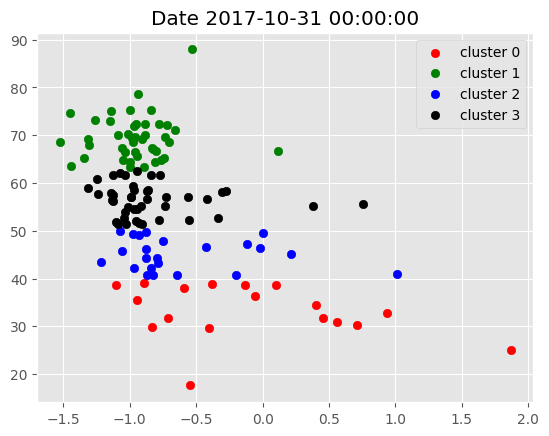

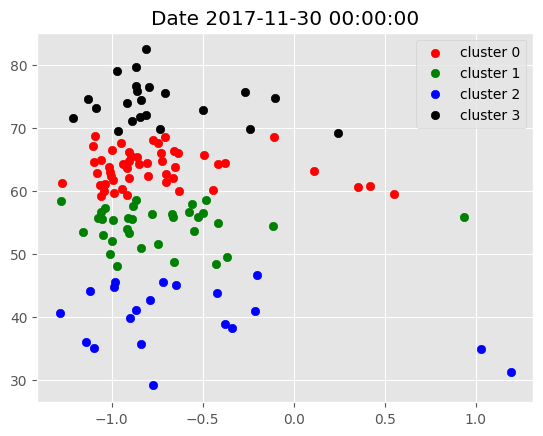

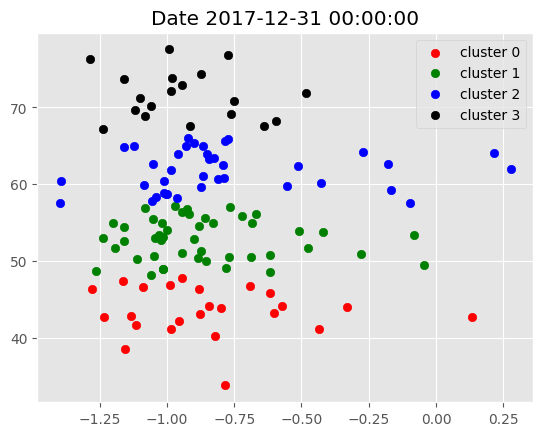

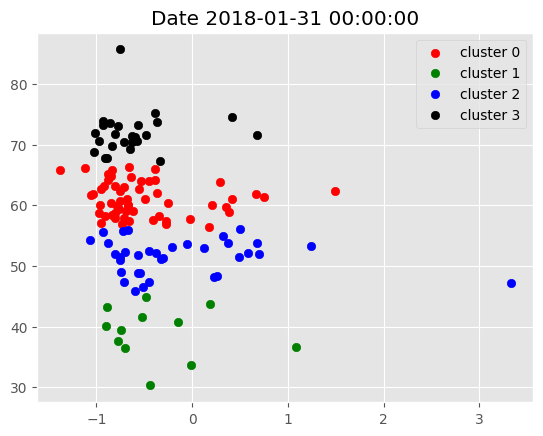

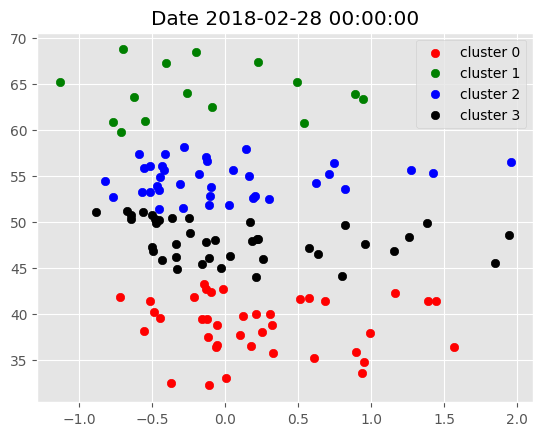

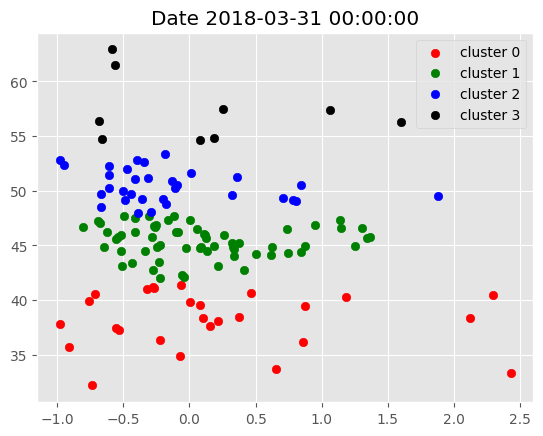

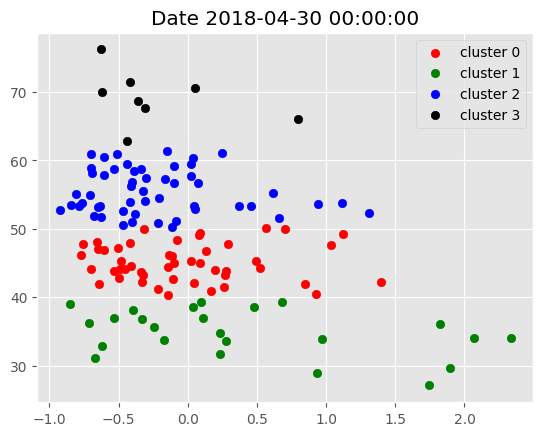

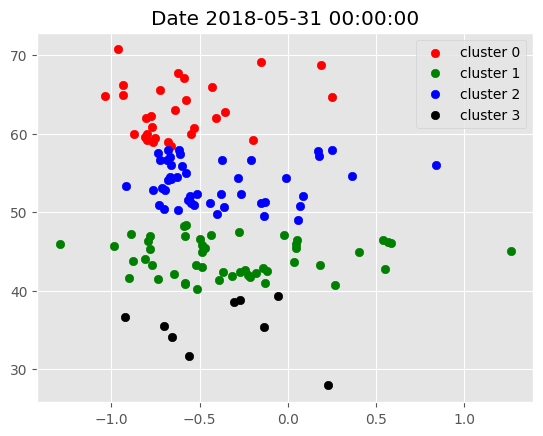

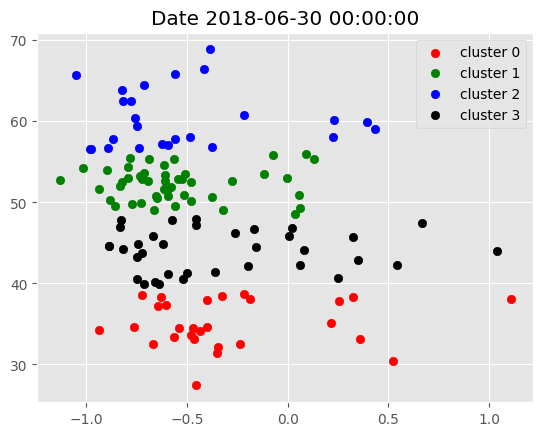

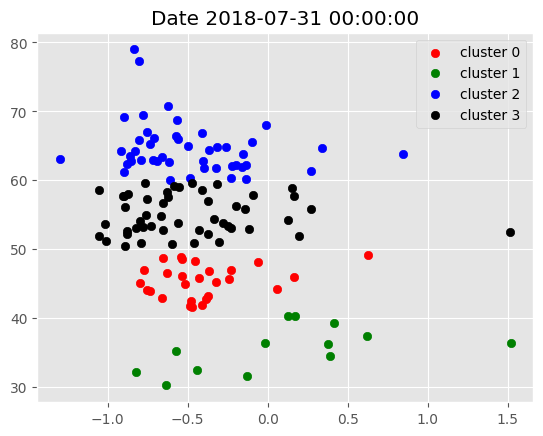

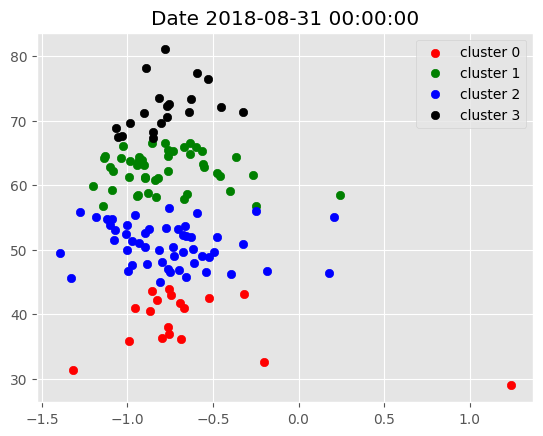

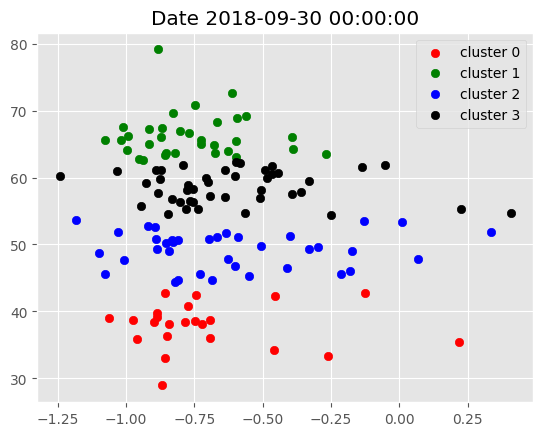

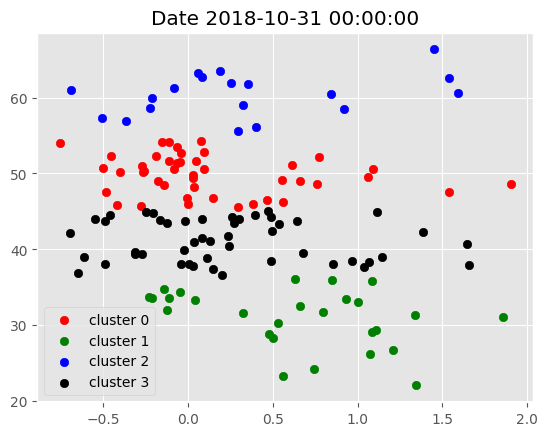

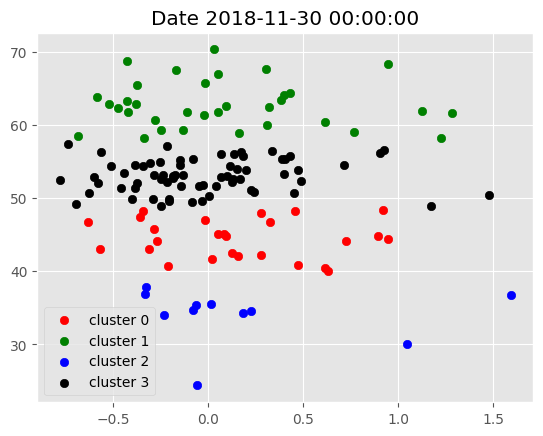

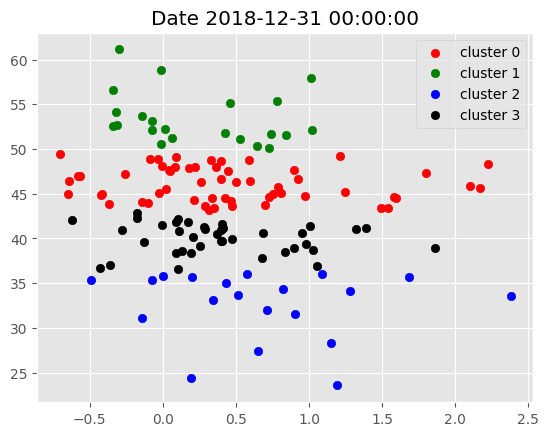

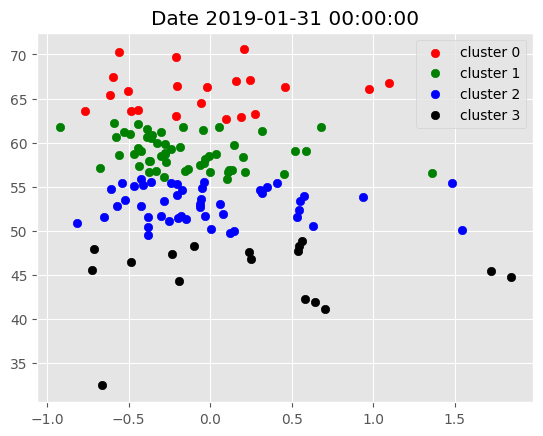

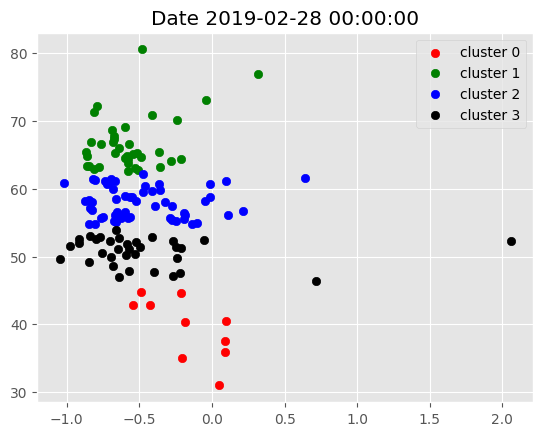

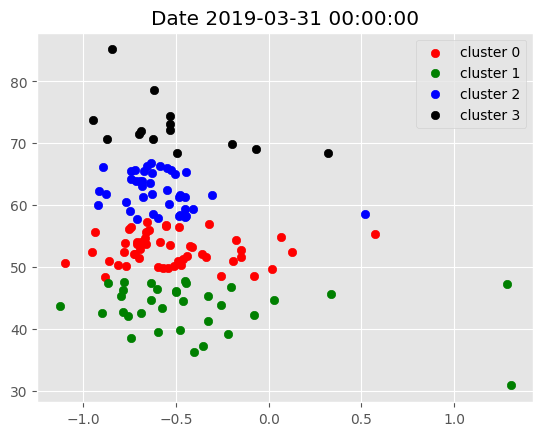

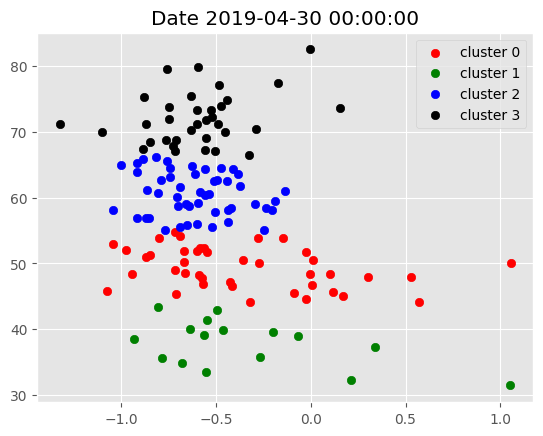

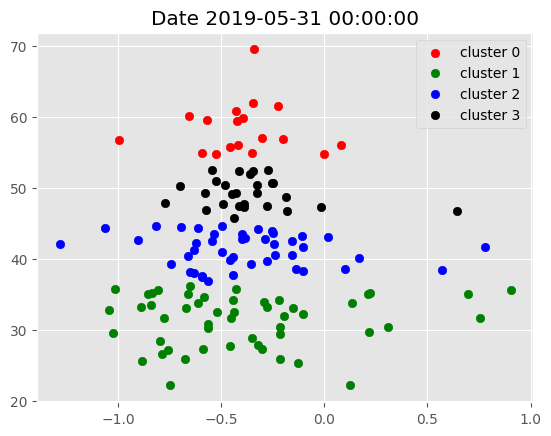

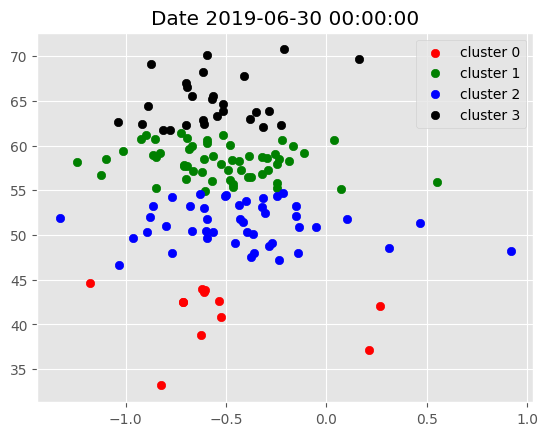

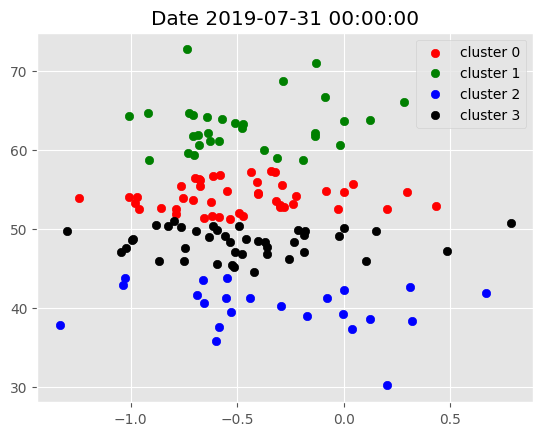

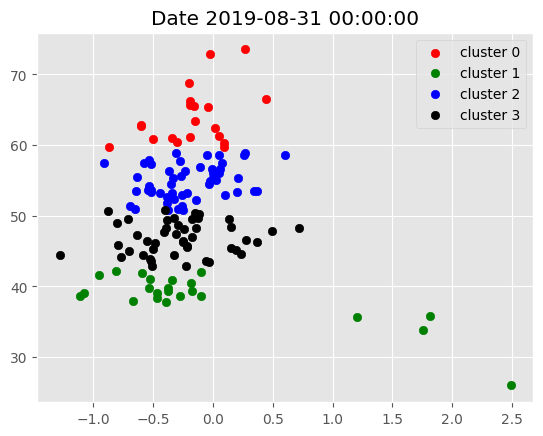

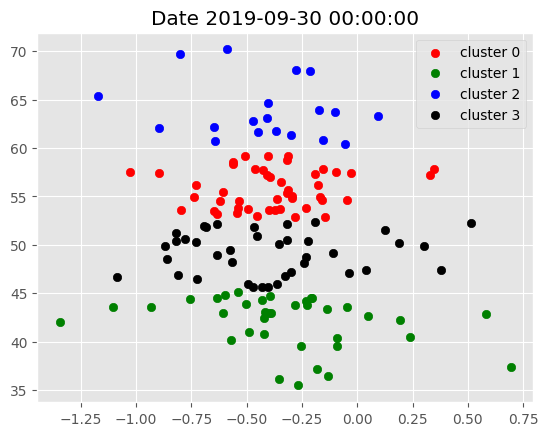

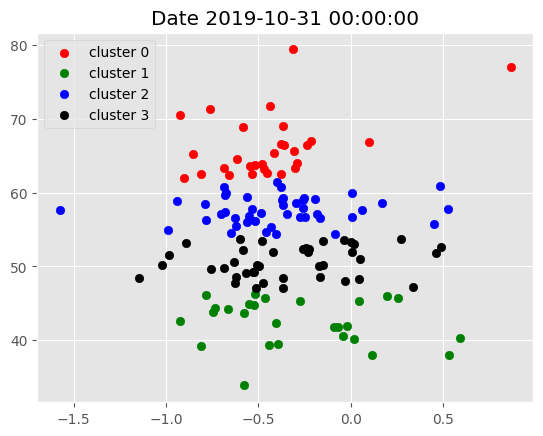

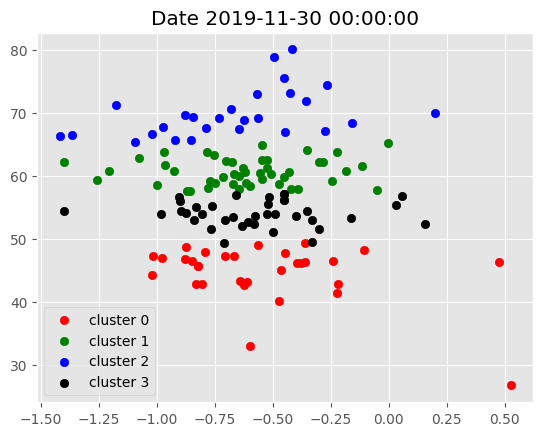

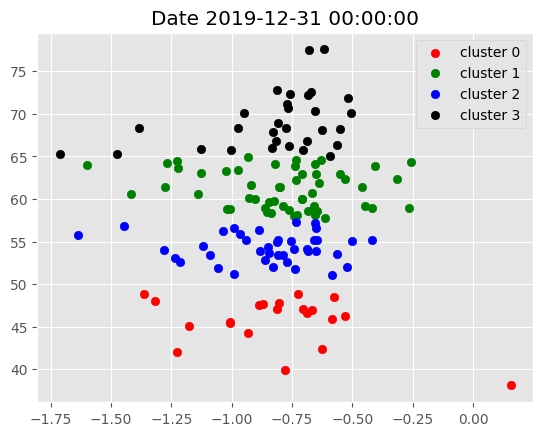

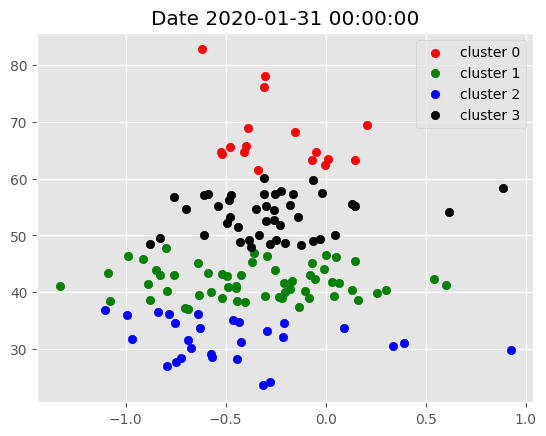

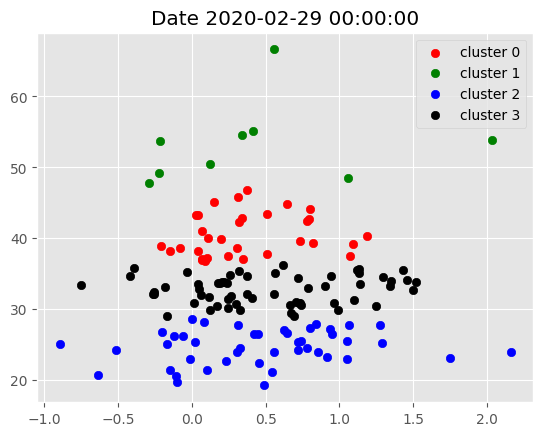

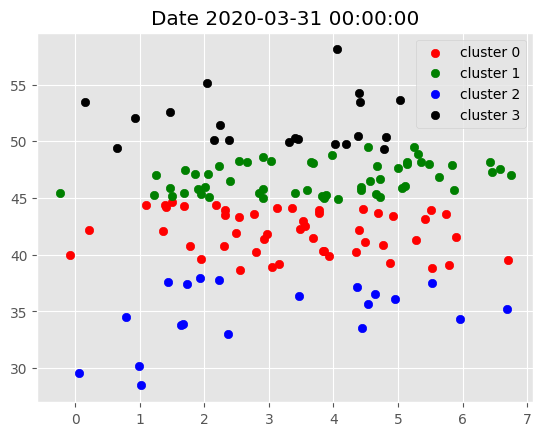

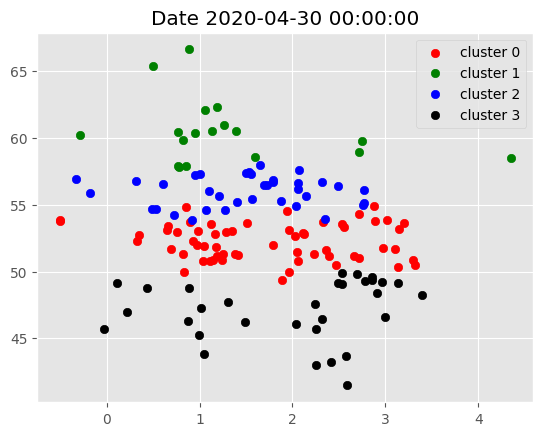

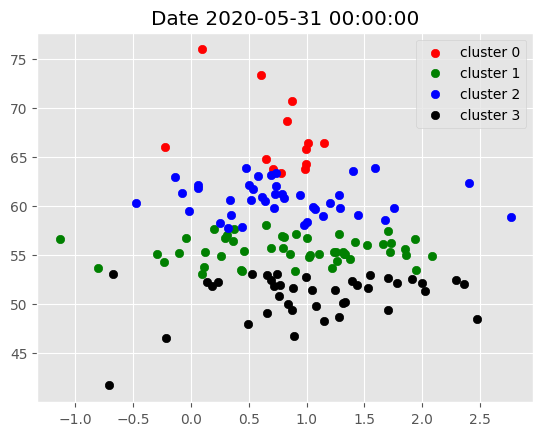

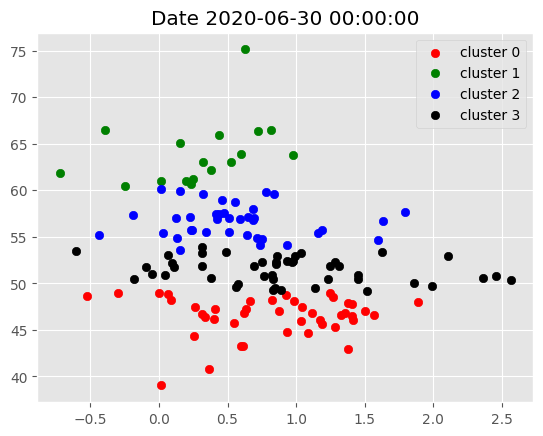

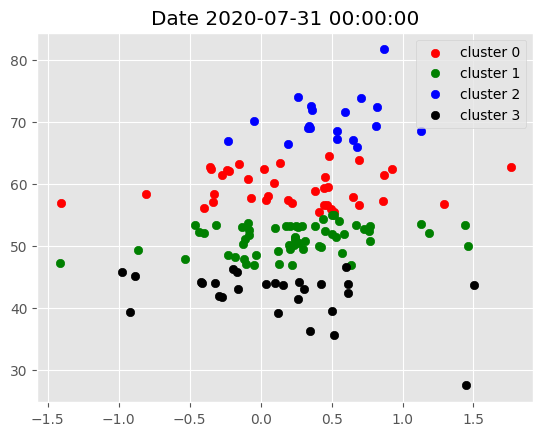

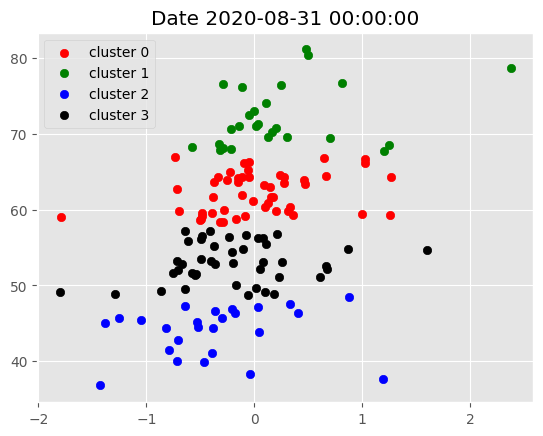

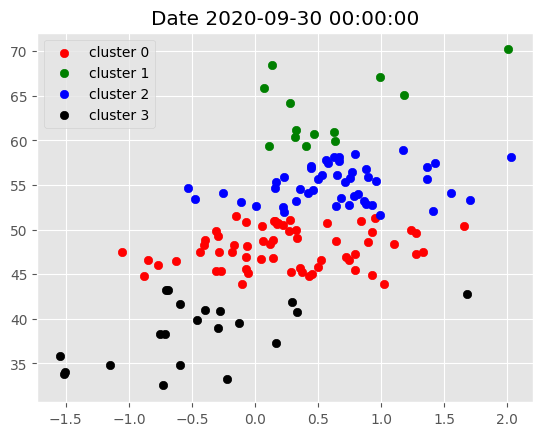

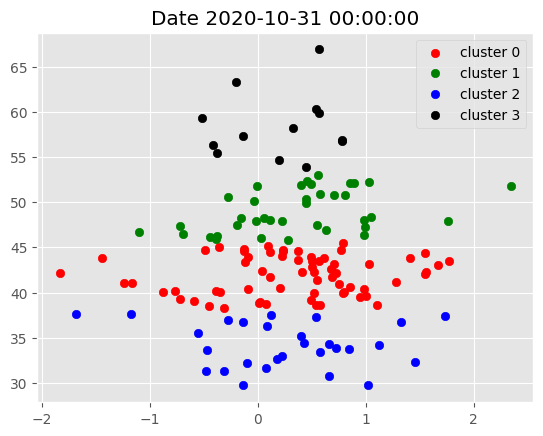

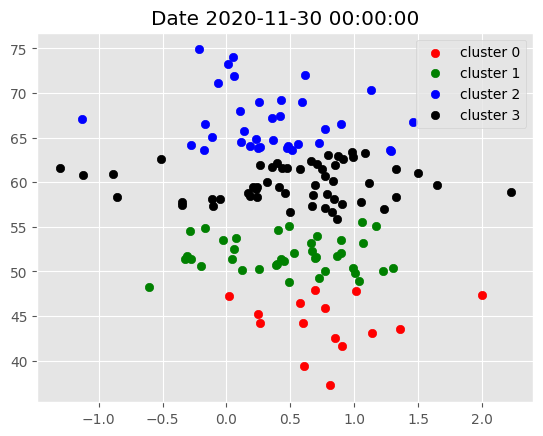

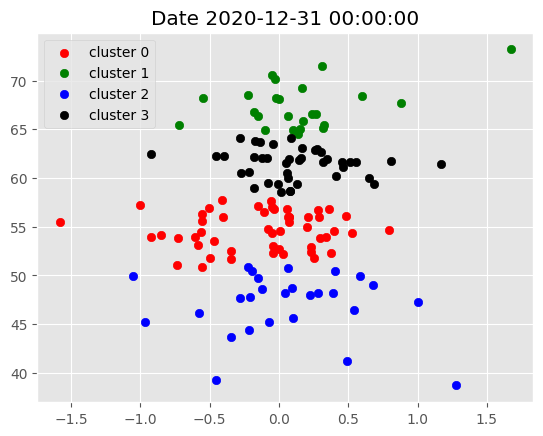

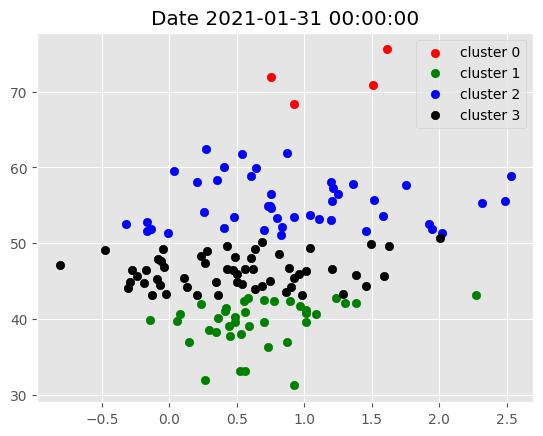

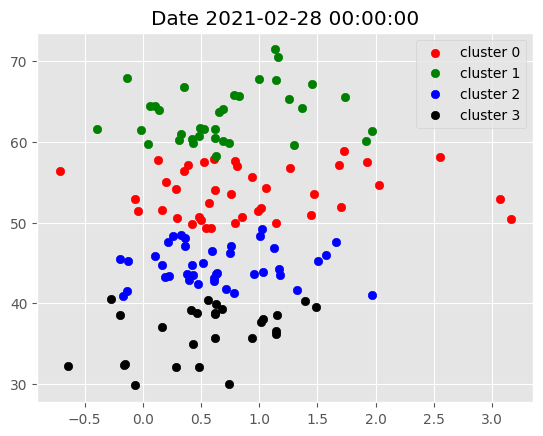

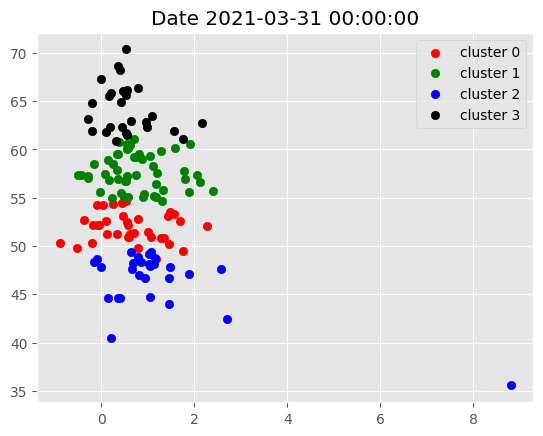

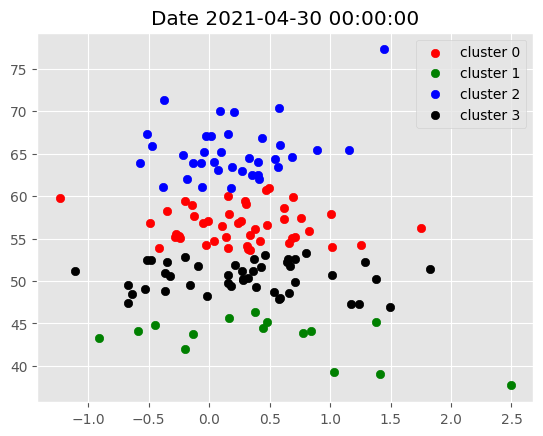

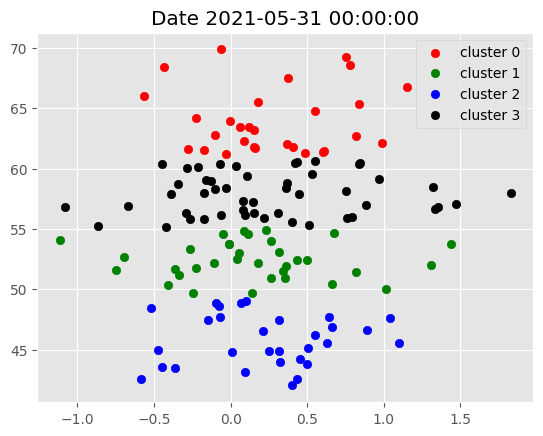

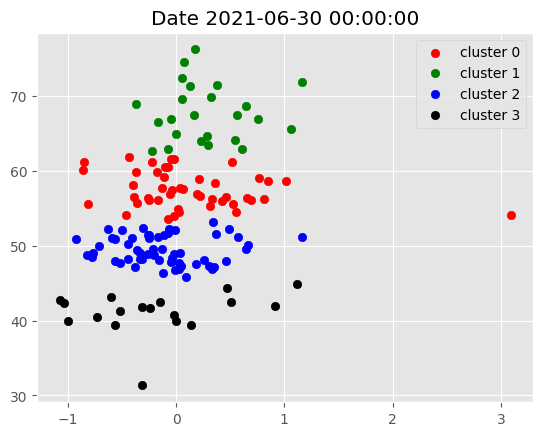

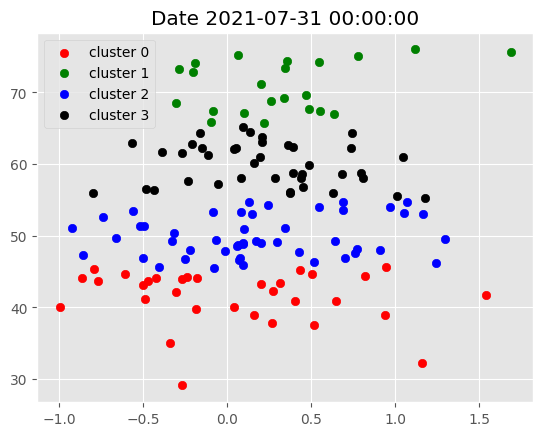

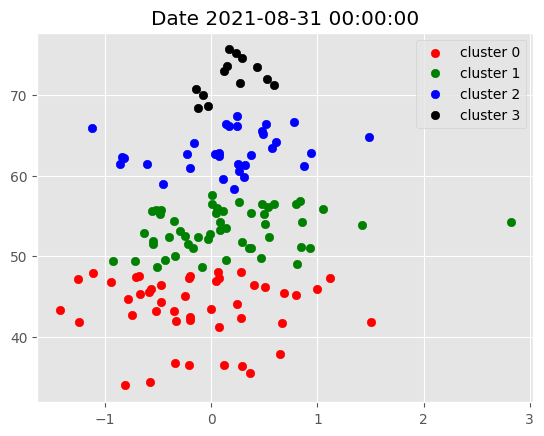

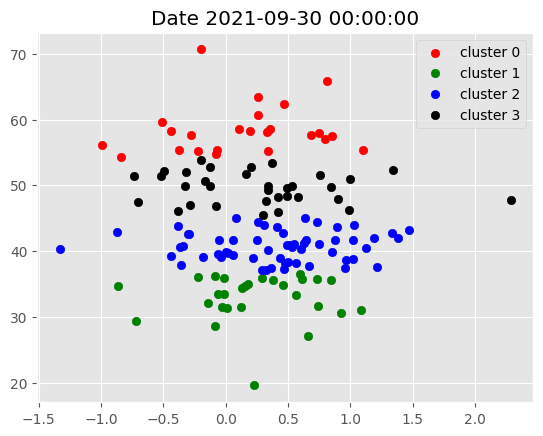

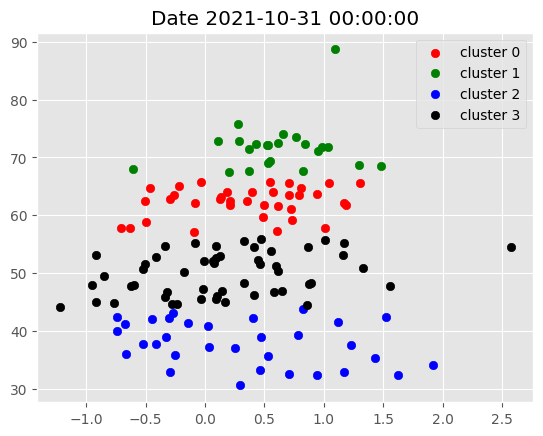

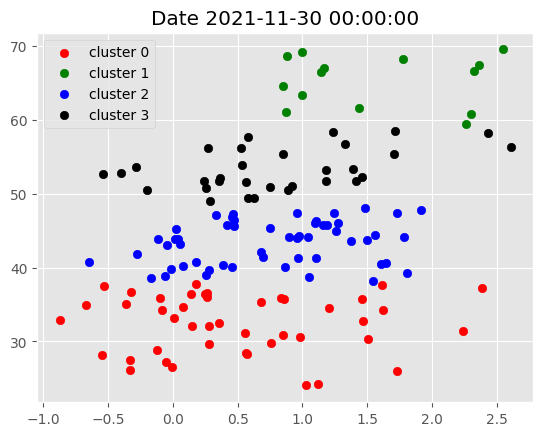

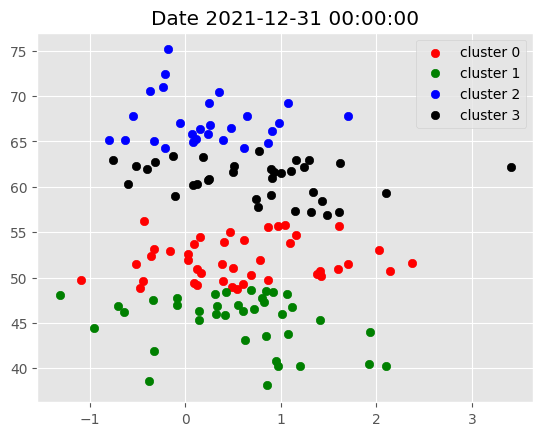

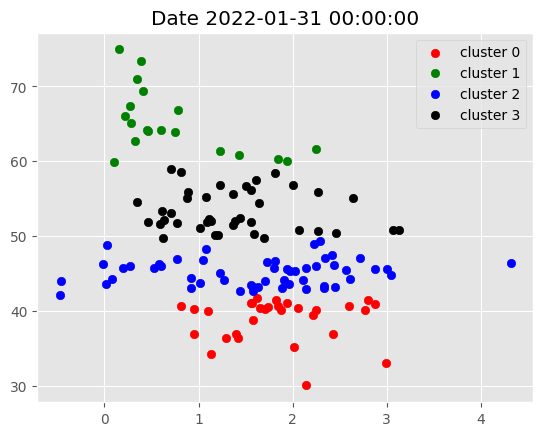

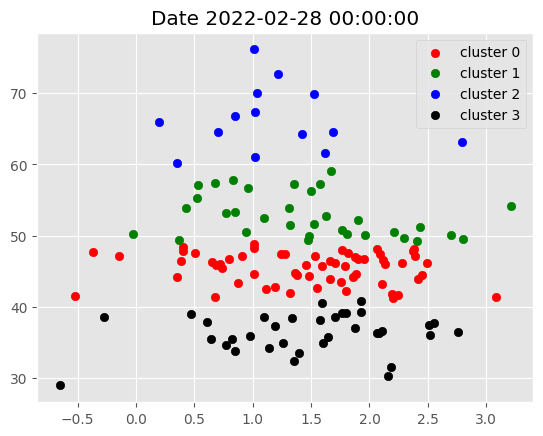

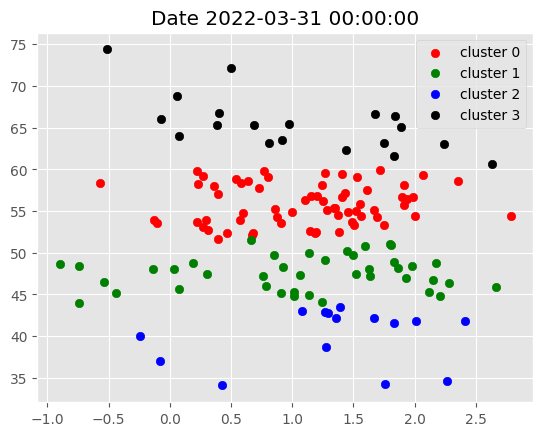

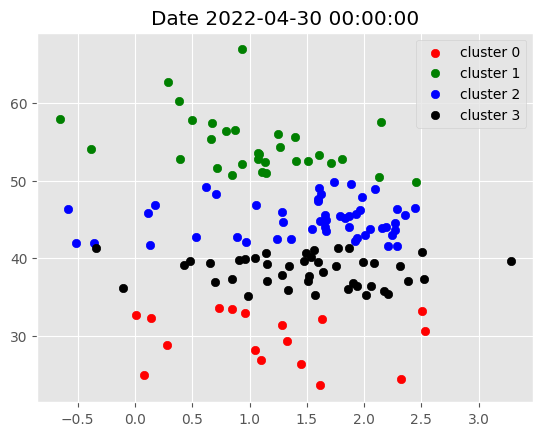

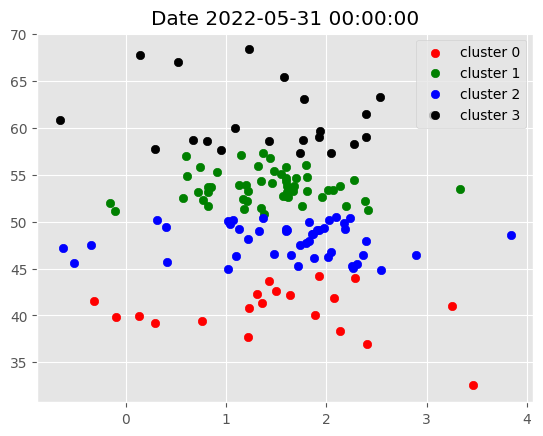

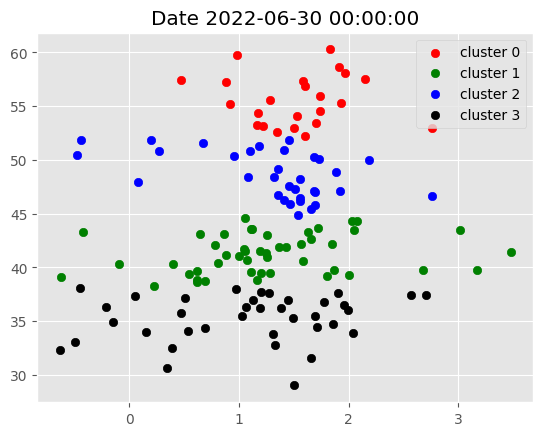

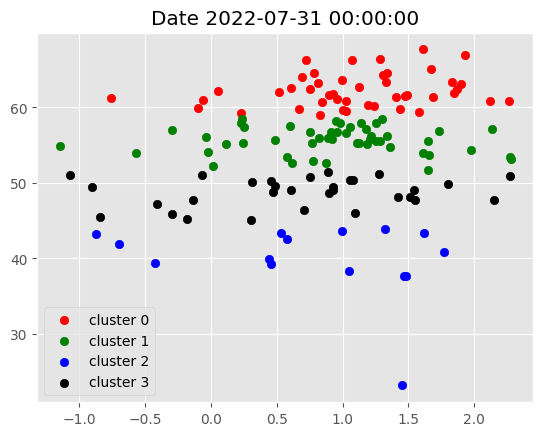

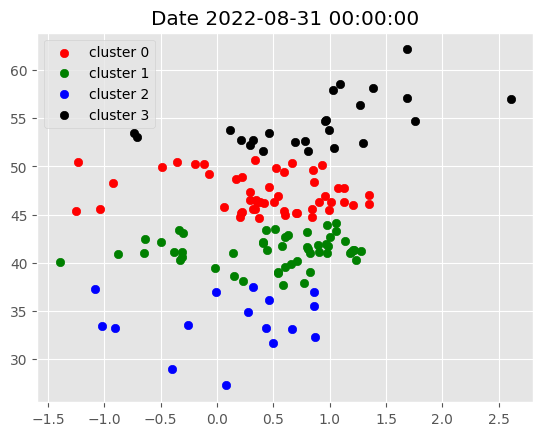

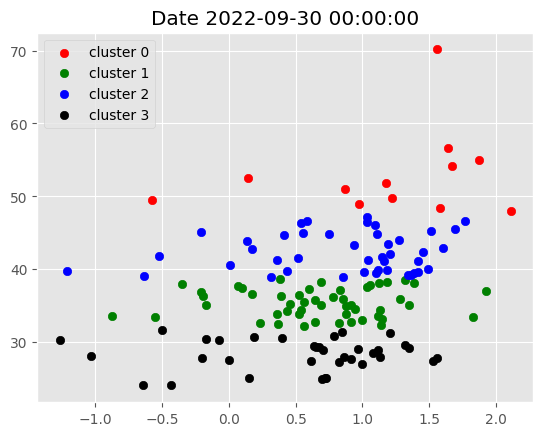

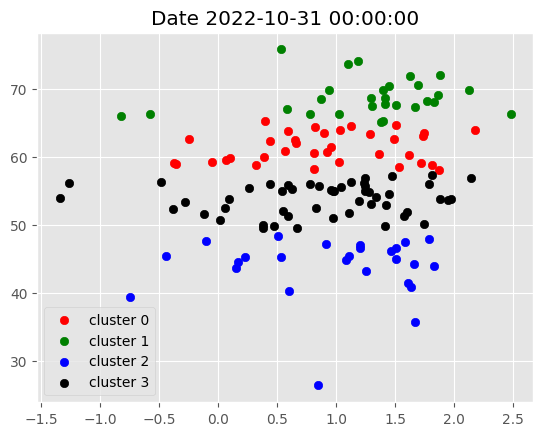

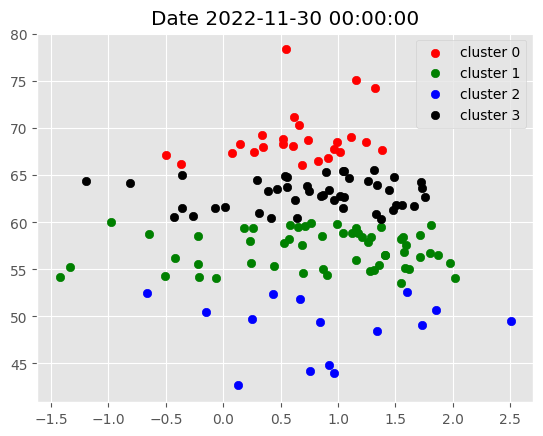

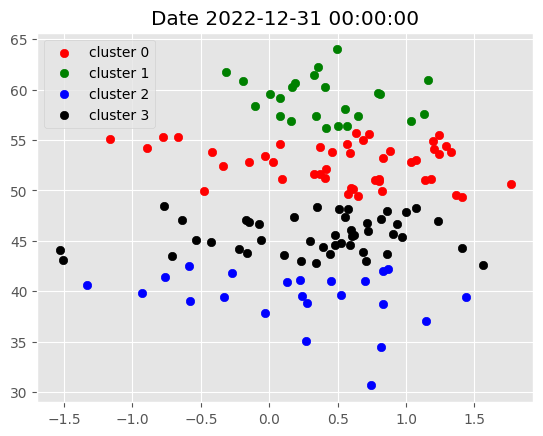

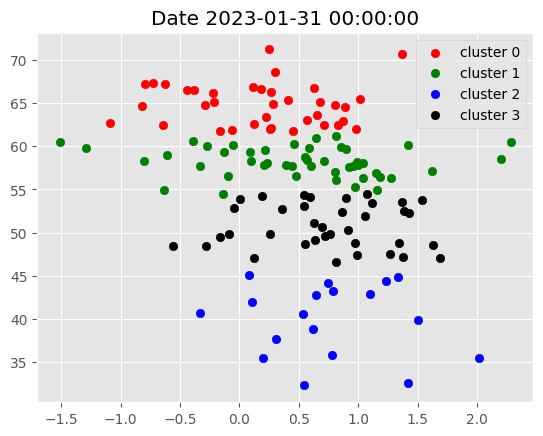

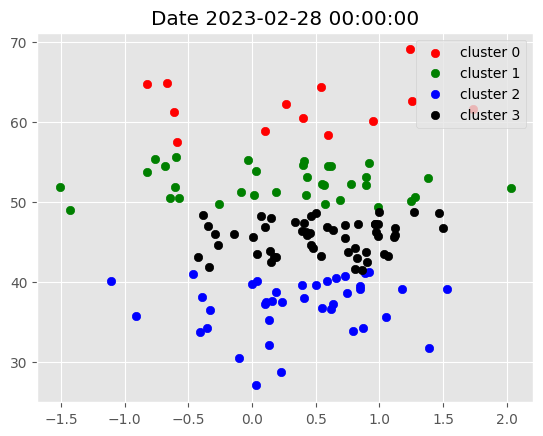

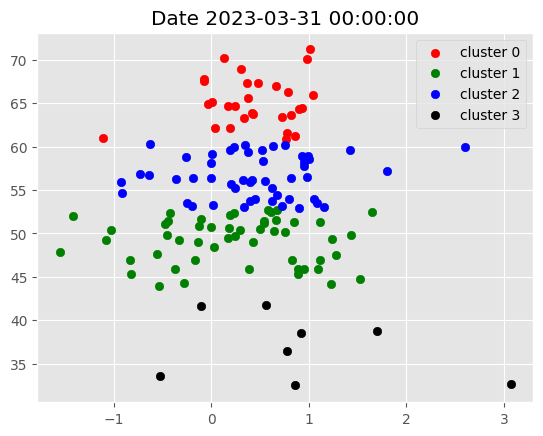

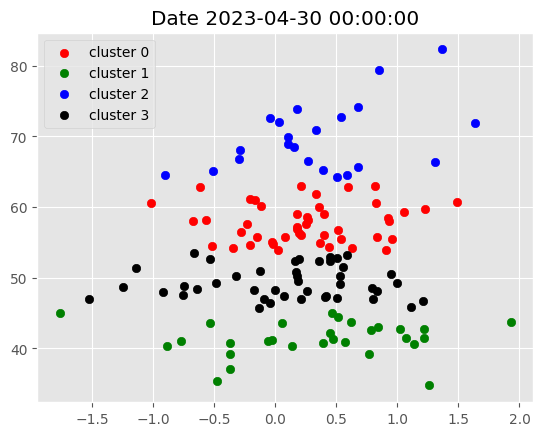

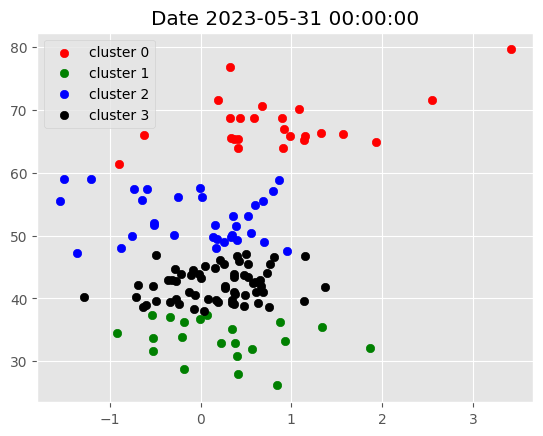

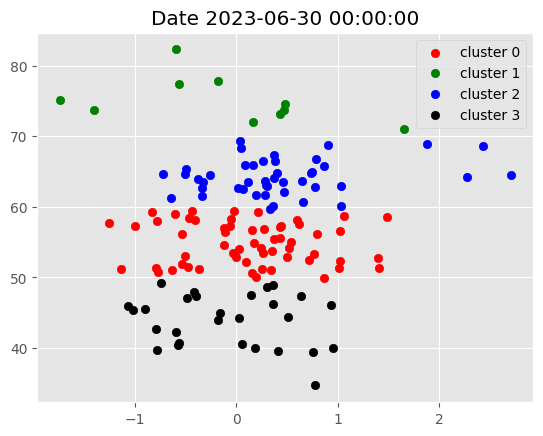

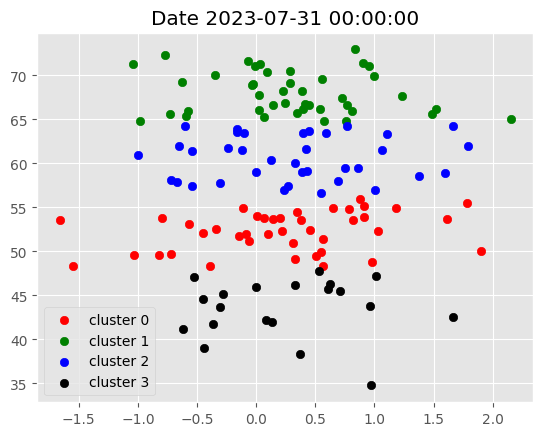

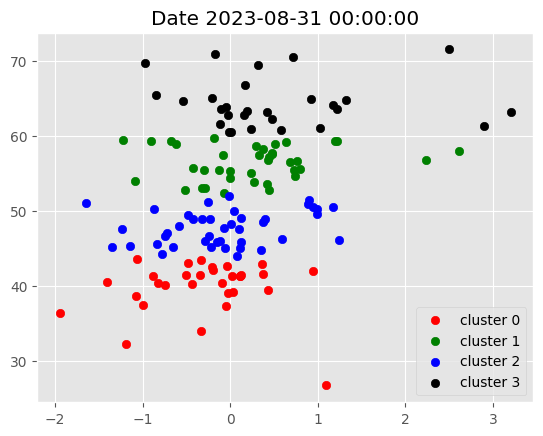

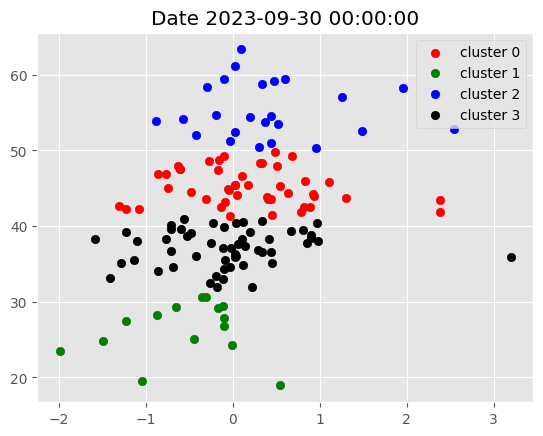

In [92]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():

    g = data.xs(i, level=0)

    plt.title(f'Date {i}')

    plot_clusters(g)

**Apply pre-defined centroids.**

In [93]:
target_rsi_values = [30, 45, 55, 70]

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [94]:
initial_centroids[:, 6] = target_rsi_values

initial_centroids

array([[ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [95]:
data

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
date       ticker                                                             
2017-10-31 AAL     1.011062  3.994389  3.849110  3.921750         -0.000363   
           AAPL   -0.906642  3.689796  3.596048  3.642922         -0.000998   
           ABBV    0.375557  4.298592  4.205859  4.252226         -0.031904   
           ABT    -1.040044  3.944558  3.897414  3.920986         -0.004755   
           ACN    -0.986514  4.885869  4.806508  4.846188         -0.003628   
...                     ...       ...       ...       ...               ...   
2023-09-30 WFC    -0.558742  3.783384  3.702645  3.743015          0.000016   
           WMT    -0.196381  4.026648  3.991704  4.009176          0.000011   
           XOM     0.601335  4.775304  4.695106  4.735205          0.000026   
           MRNA   -0.529511  4.788149  4.582514  4.685332          0.000146   
           UBER   -0.746098  3.917801  3.806654  3.862227          0.000441   

                       macd        rsi  return_1m  return_2m  return_3m  \
date       ticker                                                         
2017-10-31 AAL    -0.018698  41.051764  -0.014108   0.022981  -0.023860   
           AAPL   -0.039275  69.196775   0.096808   0.015250   0.044955   
           ABBV    0.473814  55.247875   0.022728   0.098590   0.091379   
           ABT     0.276133  53.844852   0.021276   0.034308   0.034801   
           ACN     0.352343  69.365428   0.064180   0.048455   0.037203   
...                     ...        ...        ...        ...        ...   
2023-09-30 WFC    -0.282325  40.920284  -0.015500  -0.057917  -0.013554   
           WMT     0.399458  54.722509  -0.000677   0.010014   0.012354   
           XOM     1.400623  59.440190   0.046947   0.046139   0.030496   
           MRNA   -0.376899  38.747314  -0.132219  -0.086803  -0.068763   
           UBER   -0.133973  45.005268  -0.062672  -0.053920   0.008422   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2017-10-31 AAL      0.016495   0.007008    0.012702  1.265664  1.314316   
           AAPL     0.028875   0.038941    0.035228  1.275750 -0.271695   
           ABBV     0.056495   0.047273    0.044026  0.494522  0.362281   
           ABT      0.038672   0.031320    0.029294  0.828092 -0.199022   
           ACN      0.028692   0.027398    0.018728  1.199047 -0.166700   
...                      ...        ...         ...       ...       ...   
2023-09-30 WFC      0.016712   0.000702    0.003255  1.137640  0.314483   
           WMT      0.017574   0.016553    0.020256  0.740055 -0.261889   
           XOM      0.012838   0.008747    0.027037  1.005967 -1.051370   
           MRNA    -0.071952  -0.064976   -0.015431  1.155154  0.762525   
           UBER     0.057244   0.066838    0.043691  1.078922  1.162540   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2017-10-31 AAL     0.601340  0.458860  0.563293        2  
           AAPL   -0.591145  0.647782  0.458079        1  
           ABBV   -0.033101  0.241982  0.164919        3  
           ABT    -0.529384  0.252406  0.970211        3  
           ACN    -0.328215  0.267791  0.168884        1  
...                     ...       ...       ...      ...  
2023-09-30 WFC     2.009072 -0.404335 -1.468838        3  
           WMT    -0.522677 -0.126424  0.642626        2  
           XOM     1.707834 -0.675679 -0.284026        2  
           MRNA   -1.165677  0.590306  0.993548        3  
           UBER   -0.257003 -1.482231 -0.450323        0  

[10065 rows x 19 columns]

In [96]:
data = data.drop('cluster',axis=1)
data

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
date       ticker                                                             
2017-10-31 AAL     1.011062  3.994389  3.849110  3.921750         -0.000363   
           AAPL   -0.906642  3.689796  3.596048  3.642922         -0.000998   
           ABBV    0.375557  4.298592  4.205859  4.252226         -0.031904   
           ABT    -1.040044  3.944558  3.897414  3.920986         -0.004755   
           ACN    -0.986514  4.885869  4.806508  4.846188         -0.003628   
...                     ...       ...       ...       ...               ...   
2023-09-30 WFC    -0.558742  3.783384  3.702645  3.743015          0.000016   
           WMT    -0.196381  4.026648  3.991704  4.009176          0.000011   
           XOM     0.601335  4.775304  4.695106  4.735205          0.000026   
           MRNA   -0.529511  4.788149  4.582514  4.685332          0.000146   
           UBER   -0.746098  3.917801  3.806654  3.862227          0.000441   

                       macd        rsi  return_1m  return_2m  return_3m  \
date       ticker                                                         
2017-10-31 AAL    -0.018698  41.051764  -0.014108   0.022981  -0.023860   
           AAPL   -0.039275  69.196775   0.096808   0.015250   0.044955   
           ABBV    0.473814  55.247875   0.022728   0.098590   0.091379   
           ABT     0.276133  53.844852   0.021276   0.034308   0.034801   
           ACN     0.352343  69.365428   0.064180   0.048455   0.037203   
...                     ...        ...        ...        ...        ...   
2023-09-30 WFC    -0.282325  40.920284  -0.015500  -0.057917  -0.013554   
           WMT     0.399458  54.722509  -0.000677   0.010014   0.012354   
           XOM     1.400623  59.440190   0.046947   0.046139   0.030496   
           MRNA   -0.376899  38.747314  -0.132219  -0.086803  -0.068763   
           UBER   -0.133973  45.005268  -0.062672  -0.053920   0.008422   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2017-10-31 AAL      0.016495   0.007008    0.012702  1.265664  1.314316   
           AAPL     0.028875   0.038941    0.035228  1.275750 -0.271695   
           ABBV     0.056495   0.047273    0.044026  0.494522  0.362281   
           ABT      0.038672   0.031320    0.029294  0.828092 -0.199022   
           ACN      0.028692   0.027398    0.018728  1.199047 -0.166700   
...                      ...        ...         ...       ...       ...   
2023-09-30 WFC      0.016712   0.000702    0.003255  1.137640  0.314483   
           WMT      0.017574   0.016553    0.020256  0.740055 -0.261889   
           XOM      0.012838   0.008747    0.027037  1.005967 -1.051370   
           MRNA    -0.071952  -0.064976   -0.015431  1.155154  0.762525   
           UBER     0.057244   0.066838    0.043691  1.078922  1.162540   

                        HML       RMW       CMA  
date       ticker                                
2017-10-31 AAL     0.601340  0.458860  0.563293  
           AAPL   -0.591145  0.647782  0.458079  
           ABBV   -0.033101  0.241982  0.164919  
           ABT    -0.529384  0.252406  0.970211  
           ACN    -0.328215  0.267791  0.168884  
...                     ...       ...       ...  
2023-09-30 WFC     2.009072 -0.404335 -1.468838  
           WMT    -0.522677 -0.126424  0.642626  
           XOM     1.707834 -0.675679 -0.284026  
           MRNA   -1.165677  0.590306  0.993548  
           UBER   -0.257003 -1.482231 -0.450323  

[10065 rows x 18 columns]

In [97]:
def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4,
                           random_state=0,
                           init=(initial_centroids)).fit(df).labels_
    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

data

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
date       ticker                                                             
2017-10-31 AAL     1.011062  3.994389  3.849110  3.921750         -0.000363   
           AAPL   -0.906642  3.689796  3.596048  3.642922         -0.000998   
           ABBV    0.375557  4.298592  4.205859  4.252226         -0.031904   
           ABT    -1.040044  3.944558  3.897414  3.920986         -0.004755   
           ACN    -0.986514  4.885869  4.806508  4.846188         -0.003628   
...                     ...       ...       ...       ...               ...   
2023-09-30 WFC    -0.558742  3.783384  3.702645  3.743015          0.000016   
           WMT    -0.196381  4.026648  3.991704  4.009176          0.000011   
           XOM     0.601335  4.775304  4.695106  4.735205          0.000026   
           MRNA   -0.529511  4.788149  4.582514  4.685332          0.000146   
           UBER   -0.746098  3.917801  3.806654  3.862227          0.000441   

                       macd        rsi  return_1m  return_2m  return_3m  \
date       ticker                                                         
2017-10-31 AAL    -0.018698  41.051764  -0.014108   0.022981  -0.023860   
           AAPL   -0.039275  69.196775   0.096808   0.015250   0.044955   
           ABBV    0.473814  55.247875   0.022728   0.098590   0.091379   
           ABT     0.276133  53.844852   0.021276   0.034308   0.034801   
           ACN     0.352343  69.365428   0.064180   0.048455   0.037203   
...                     ...        ...        ...        ...        ...   
2023-09-30 WFC    -0.282325  40.920284  -0.015500  -0.057917  -0.013554   
           WMT     0.399458  54.722509  -0.000677   0.010014   0.012354   
           XOM     1.400623  59.440190   0.046947   0.046139   0.030496   
           MRNA   -0.376899  38.747314  -0.132219  -0.086803  -0.068763   
           UBER   -0.133973  45.005268  -0.062672  -0.053920   0.008422   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2017-10-31 AAL      0.016495   0.007008    0.012702  1.265664  1.314316   
           AAPL     0.028875   0.038941    0.035228  1.275750 -0.271695   
           ABBV     0.056495   0.047273    0.044026  0.494522  0.362281   
           ABT      0.038672   0.031320    0.029294  0.828092 -0.199022   
           ACN      0.028692   0.027398    0.018728  1.199047 -0.166700   
...                      ...        ...         ...       ...       ...   
2023-09-30 WFC      0.016712   0.000702    0.003255  1.137640  0.314483   
           WMT      0.017574   0.016553    0.020256  0.740055 -0.261889   
           XOM      0.012838   0.008747    0.027037  1.005967 -1.051370   
           MRNA    -0.071952  -0.064976   -0.015431  1.155154  0.762525   
           UBER     0.057244   0.066838    0.043691  1.078922  1.162540   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2017-10-31 AAL     0.601340  0.458860  0.563293        1  
           AAPL   -0.591145  0.647782  0.458079        3  
           ABBV   -0.033101  0.241982  0.164919        2  
           ABT    -0.529384  0.252406  0.970211        2  
           ACN    -0.328215  0.267791  0.168884        3  
...                     ...       ...       ...      ...  
2023-09-30 WFC     2.009072 -0.404335 -1.468838        1  
           WMT    -0.522677 -0.126424  0.642626        3  
           XOM     1.707834 -0.675679 -0.284026        3  
           MRNA   -1.165677  0.590306  0.993548        1  
           UBER   -0.257003 -1.482231 -0.450323        2  

[10065 rows x 19 columns]

In [98]:
def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:,0] , cluster_0.iloc[:,6] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,0] , cluster_1.iloc[:,6] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,0] , cluster_2.iloc[:,6] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,0] , cluster_3.iloc[:,6] , color = 'black', label='cluster 3')

    plt.legend()
    plt.show()
    return


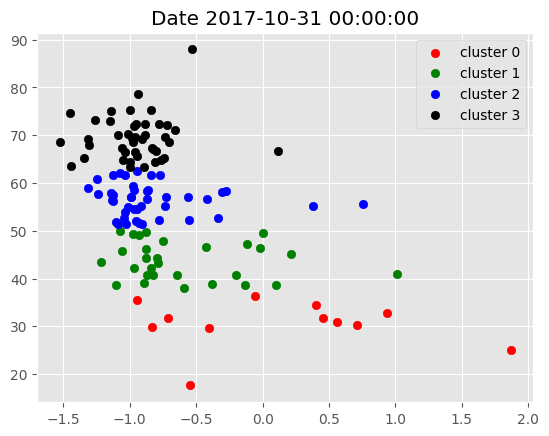

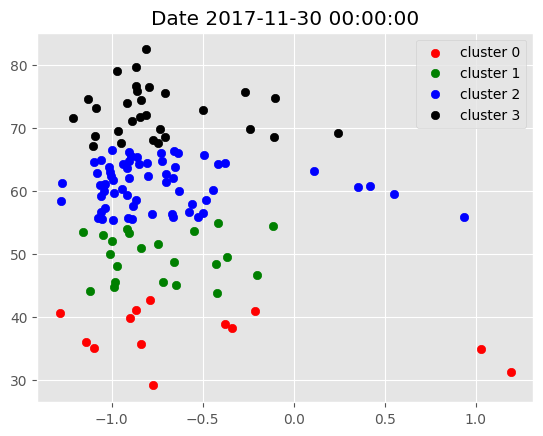

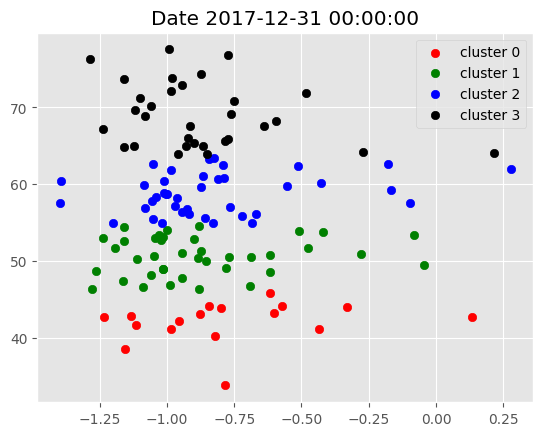

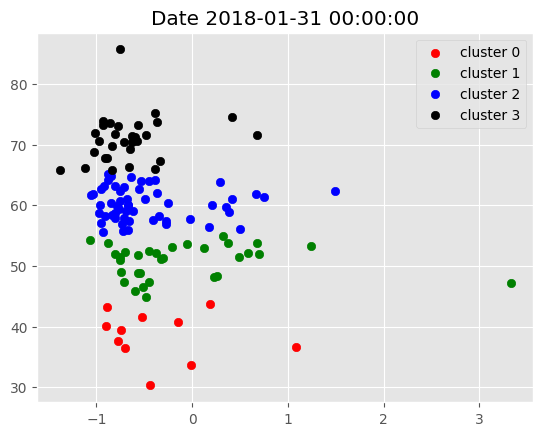

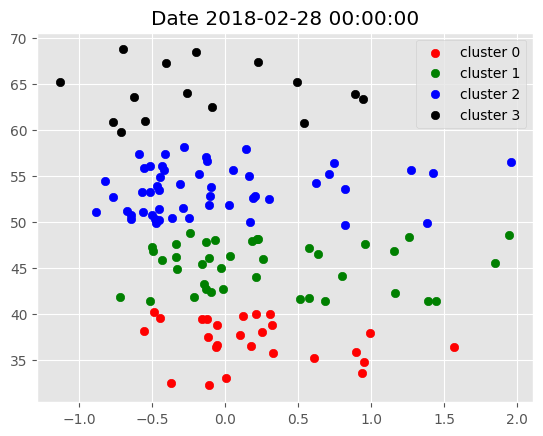

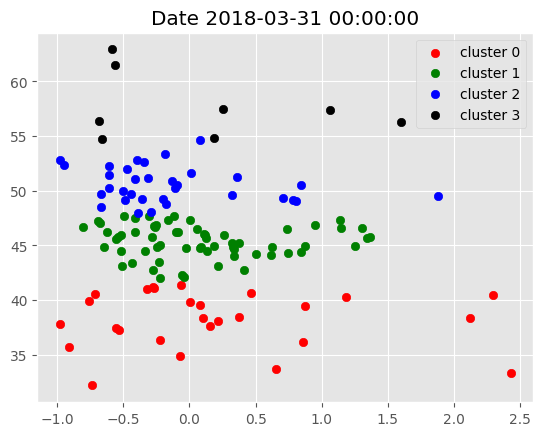

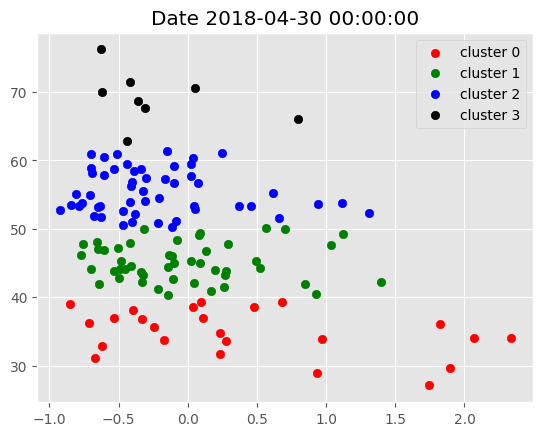

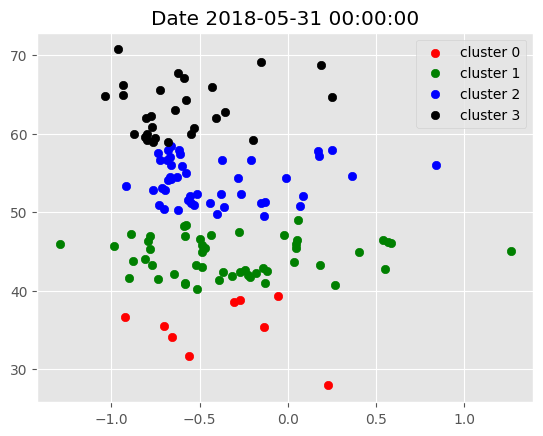

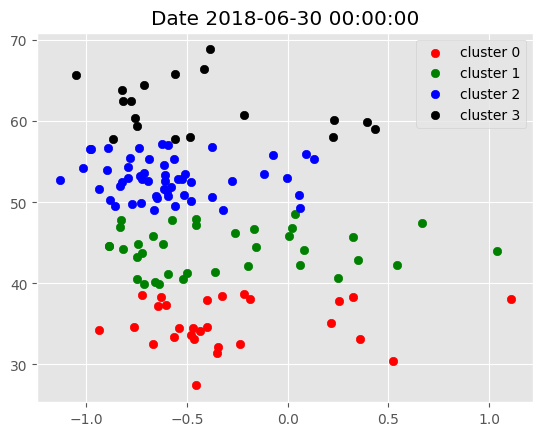

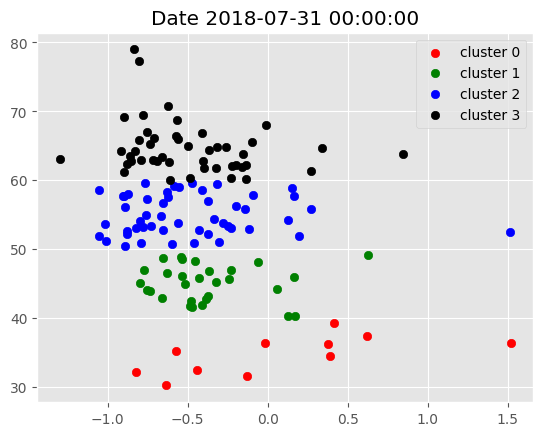

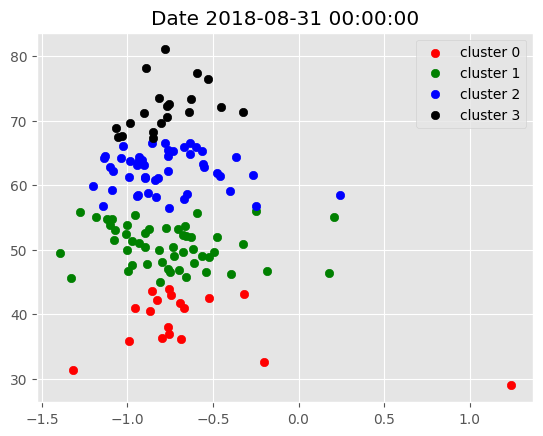

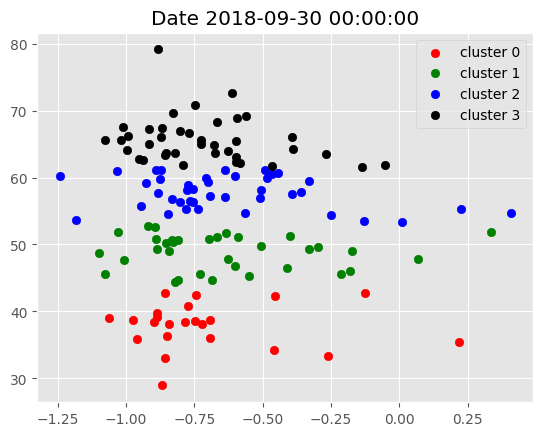

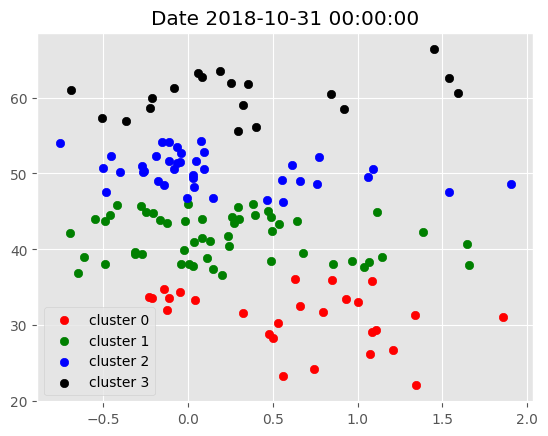

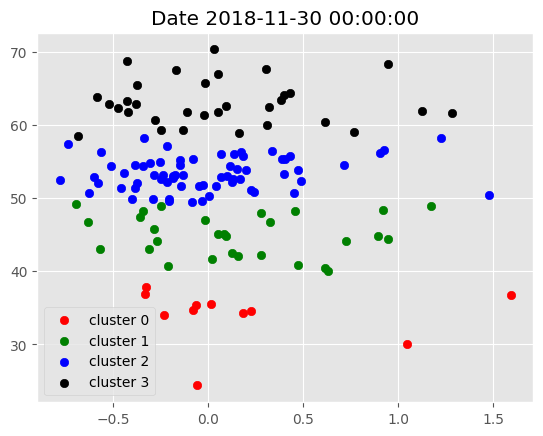

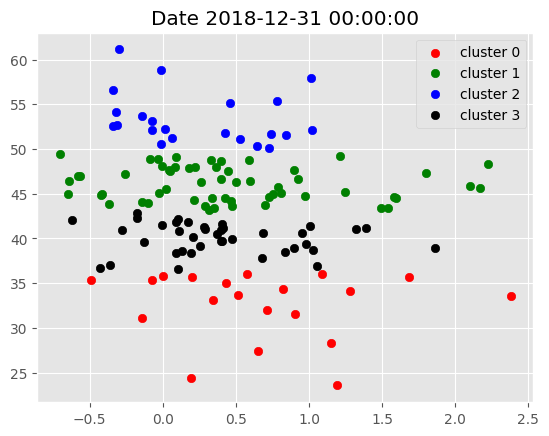

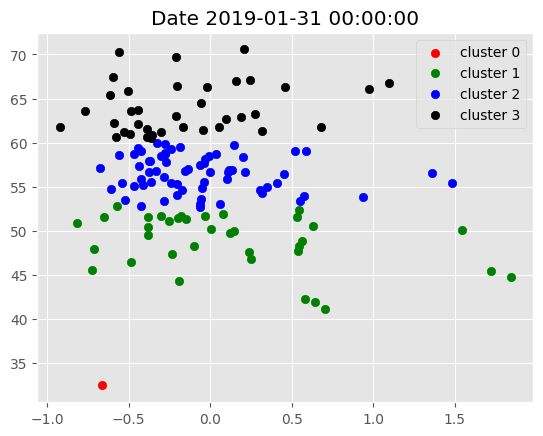

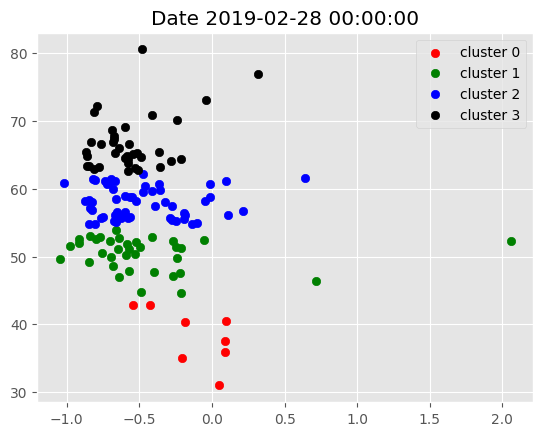

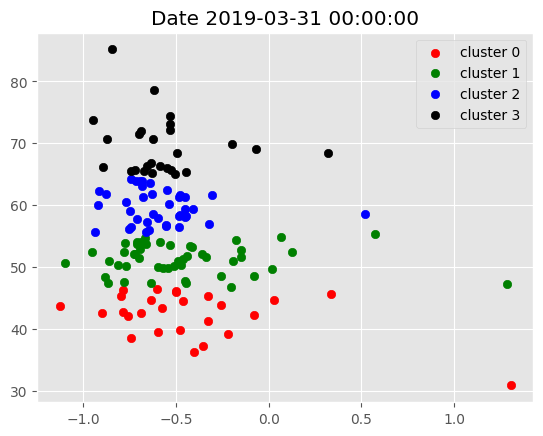

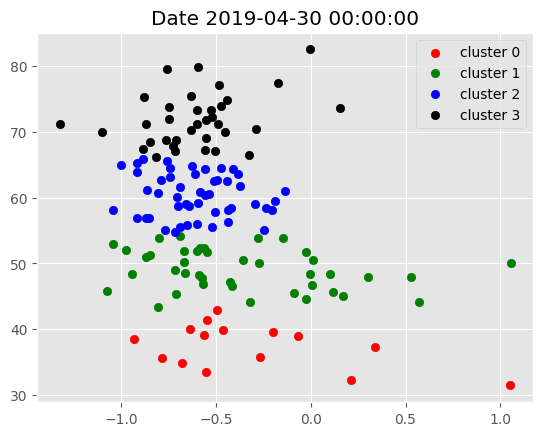

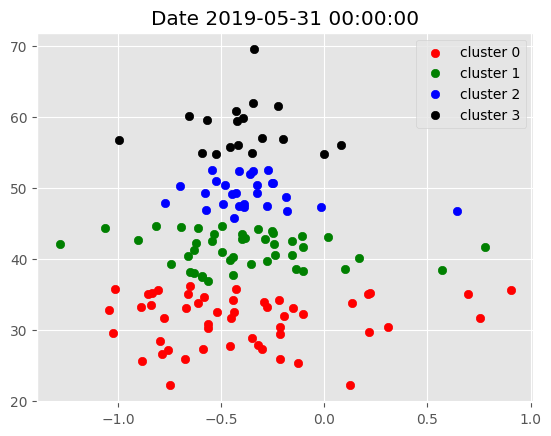

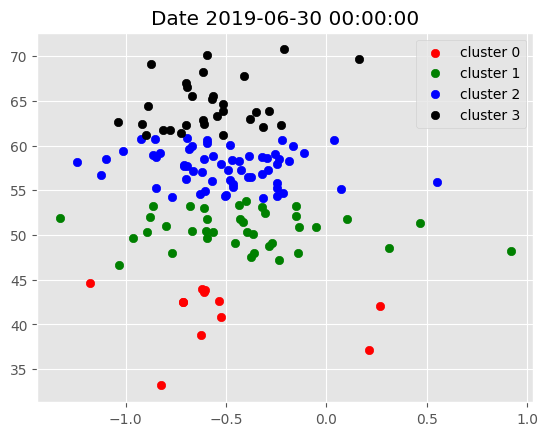

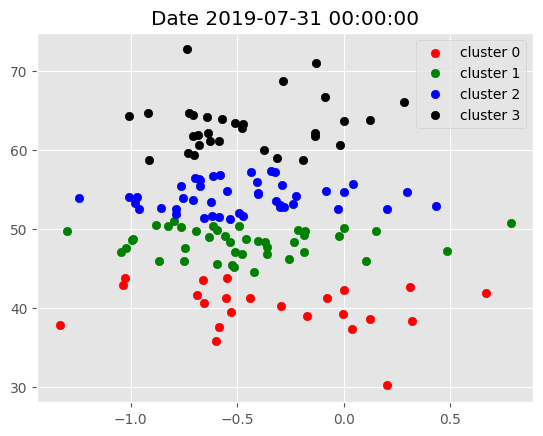

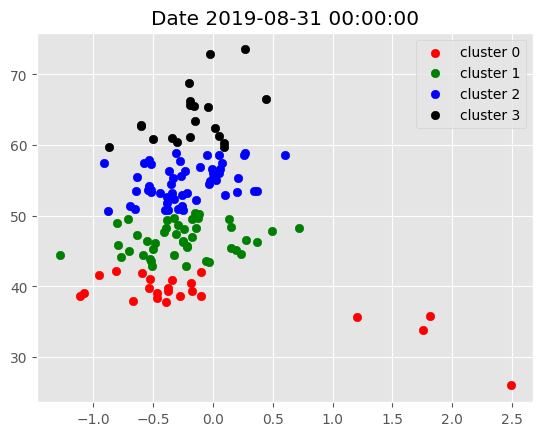

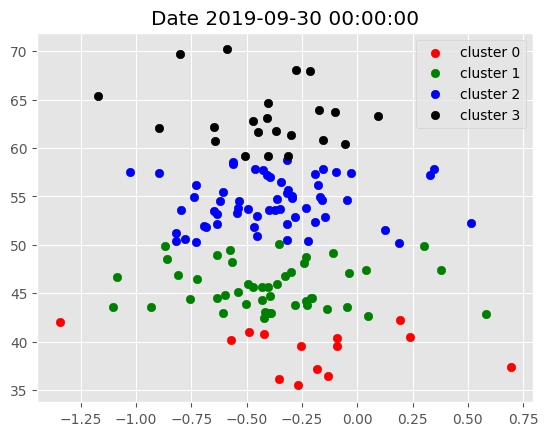

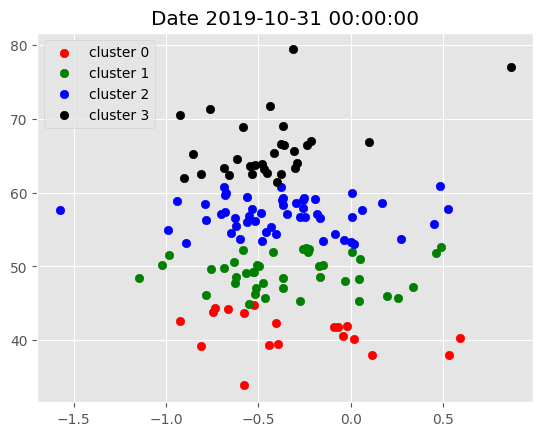

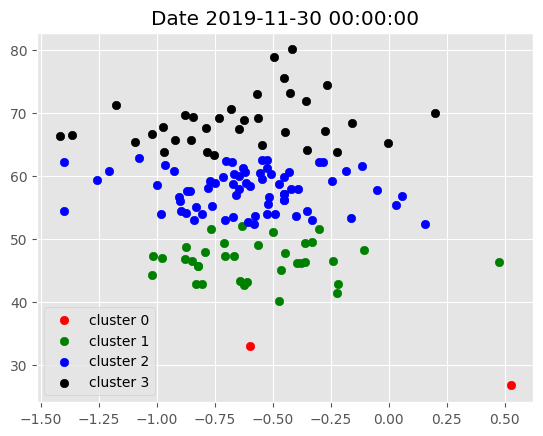

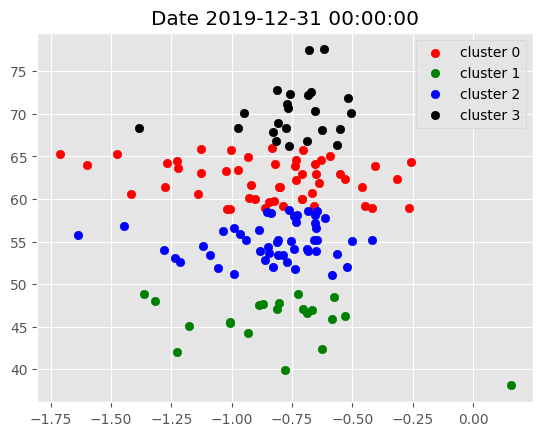

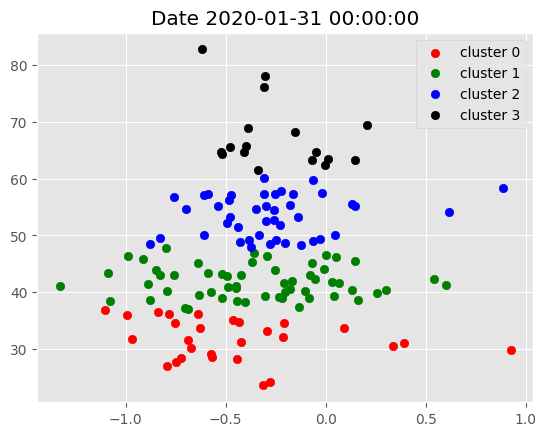

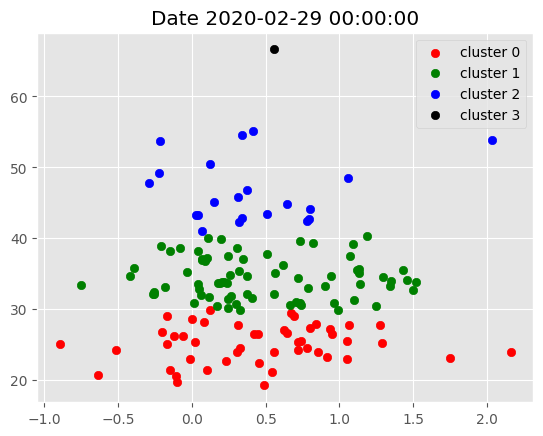

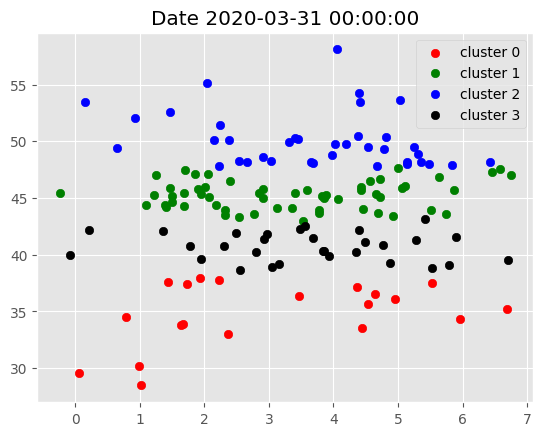

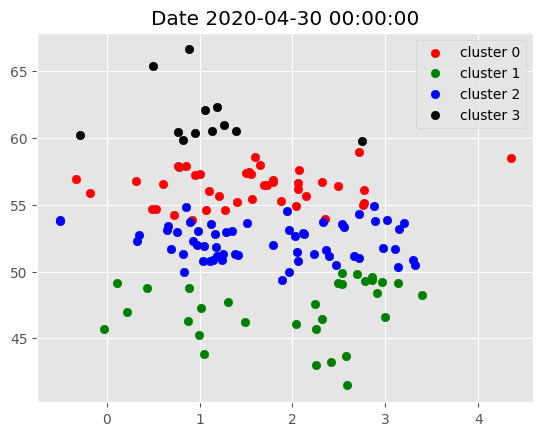

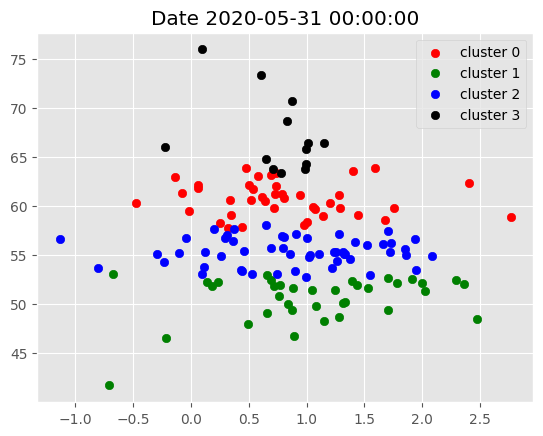

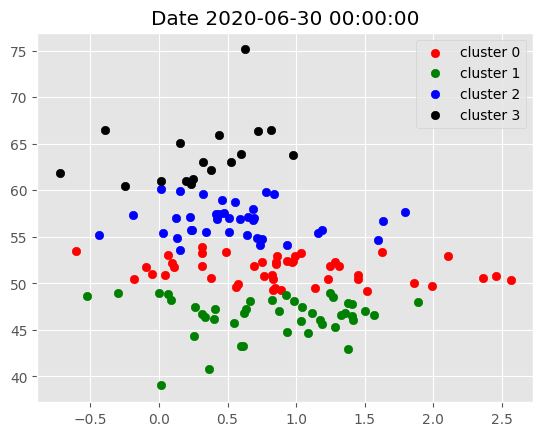

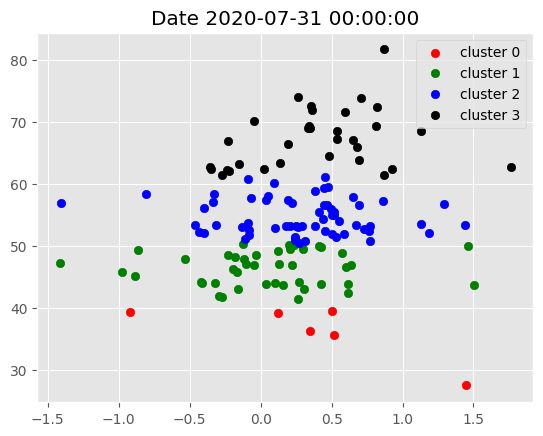

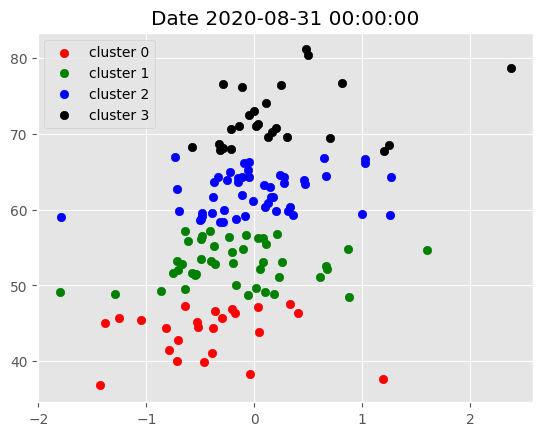

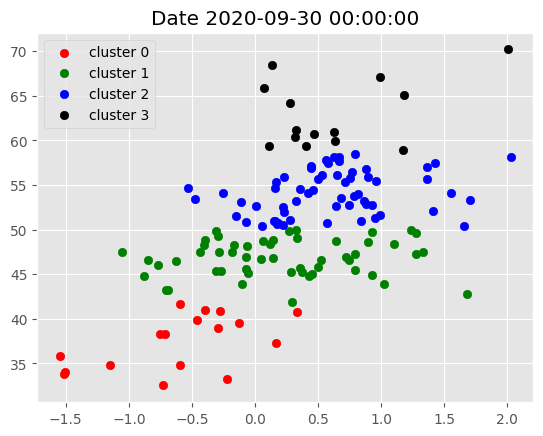

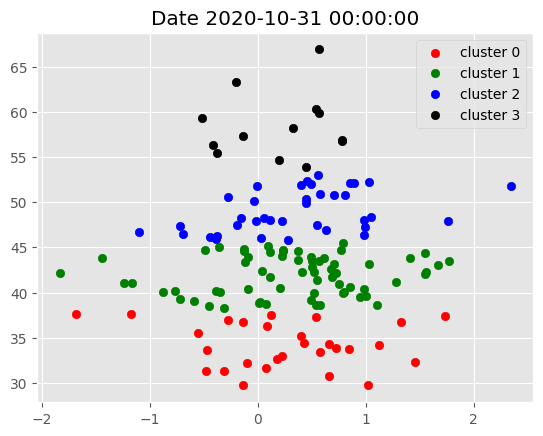

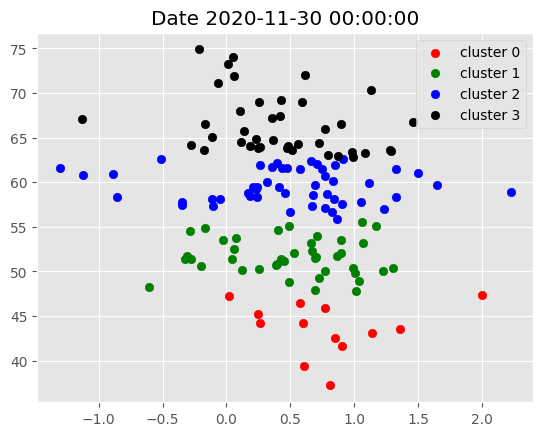

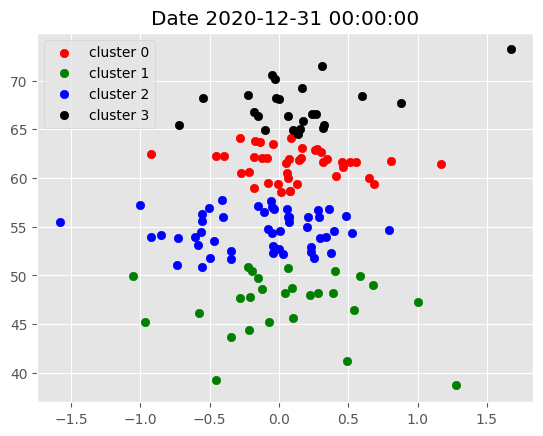

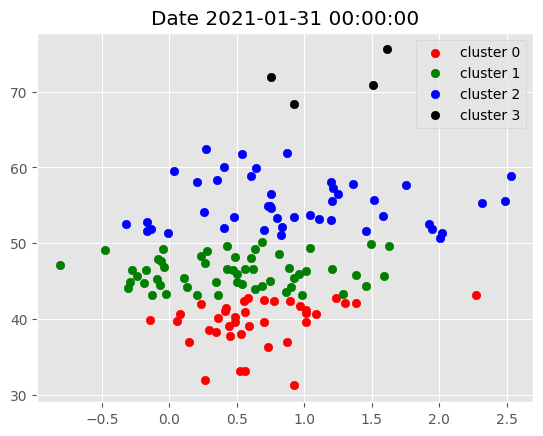

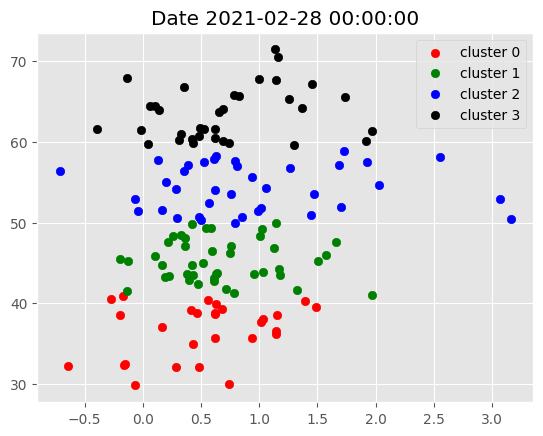

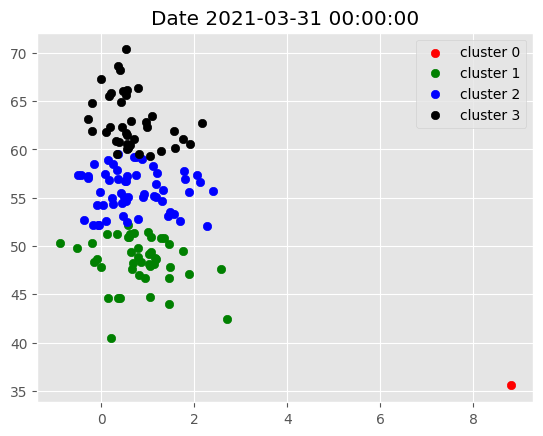

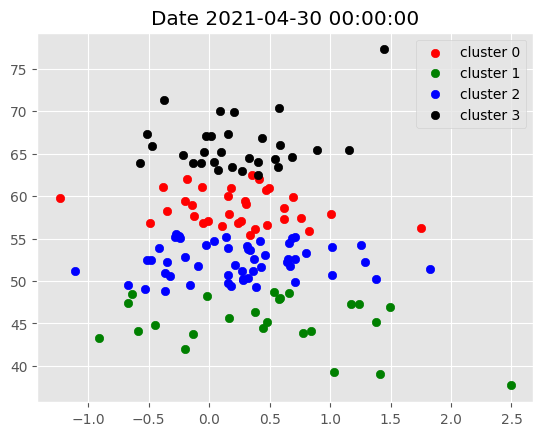

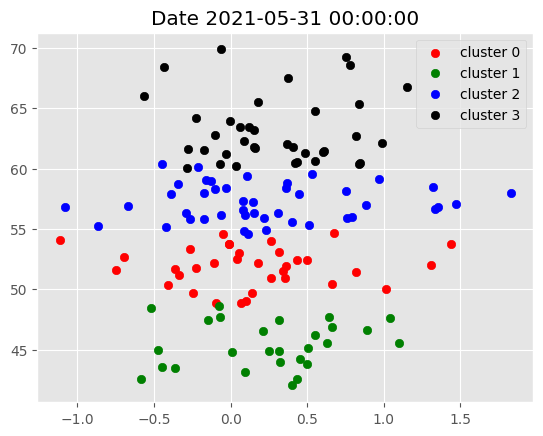

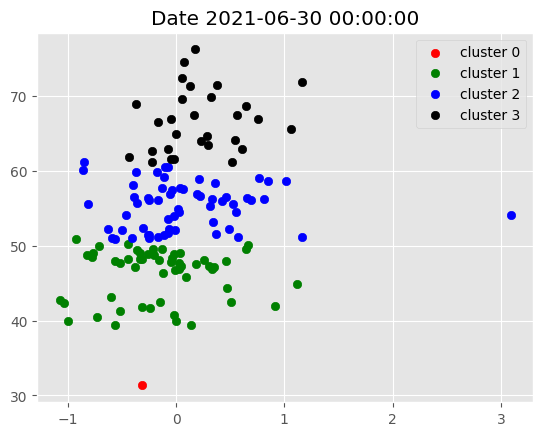

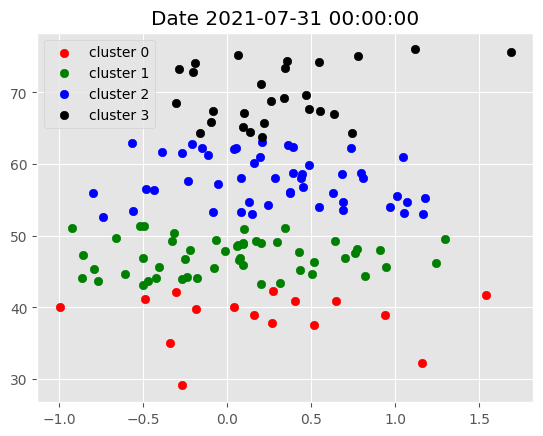

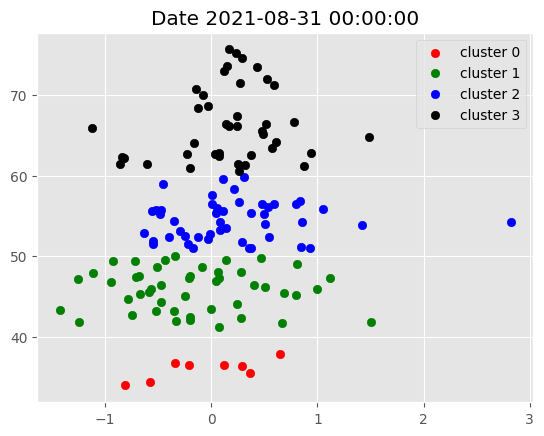

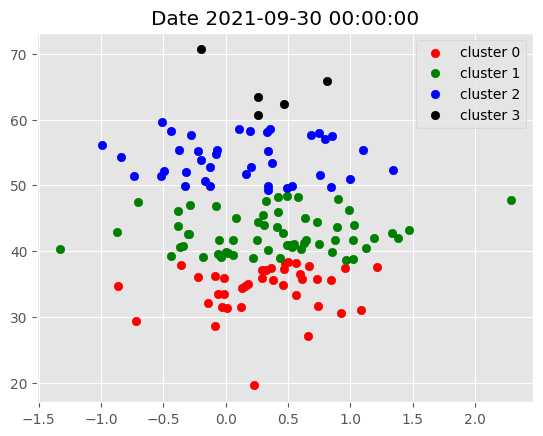

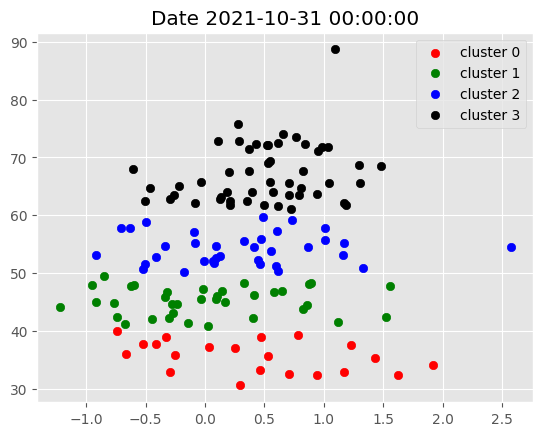

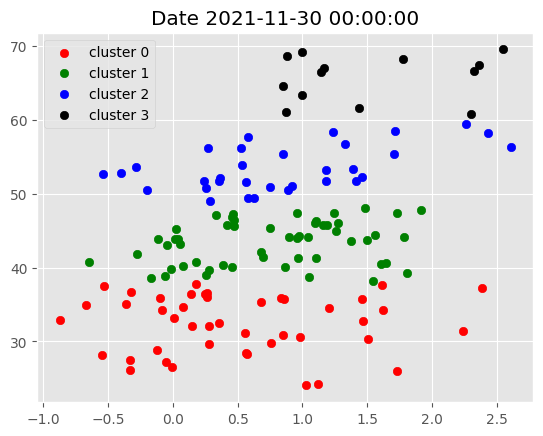

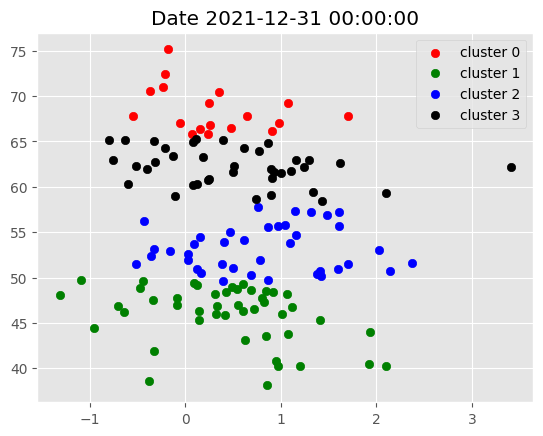

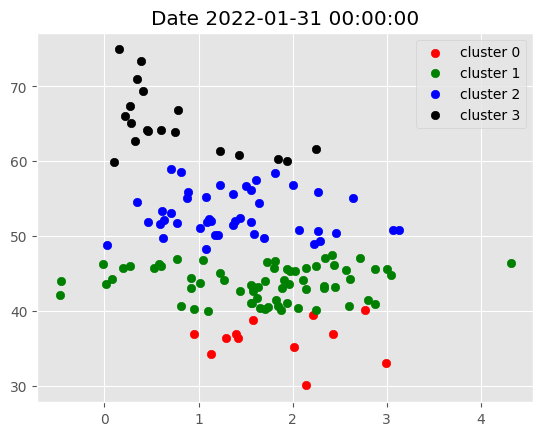

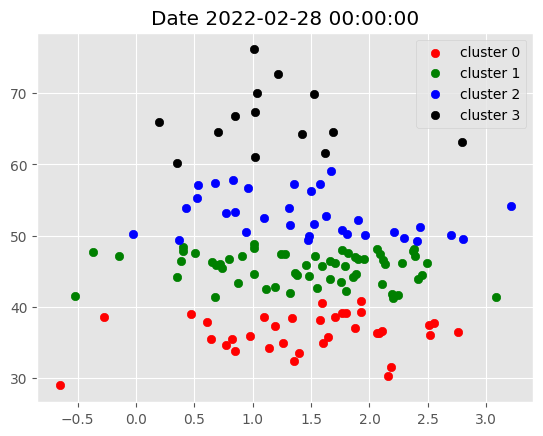

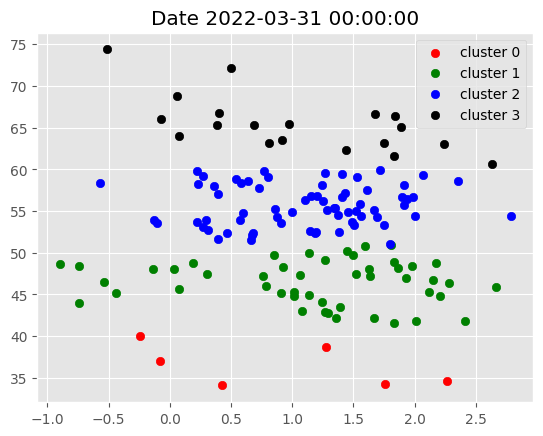

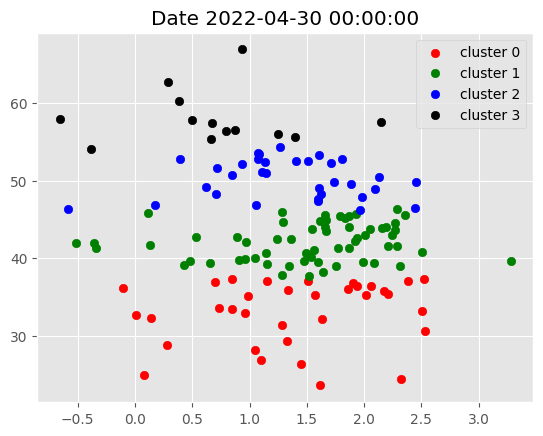

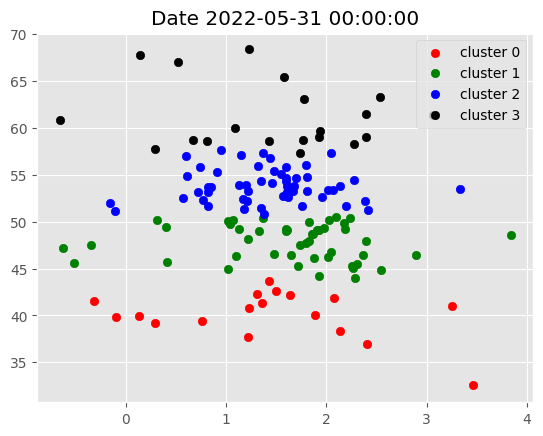

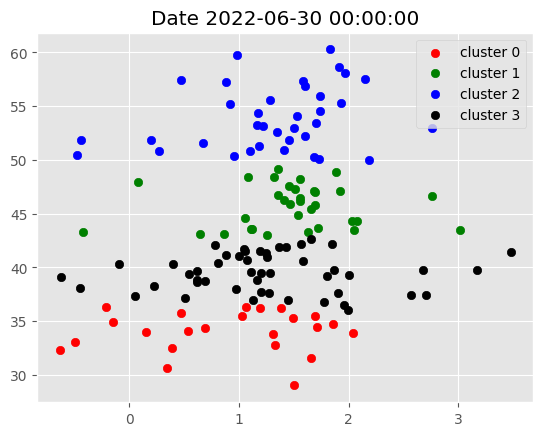

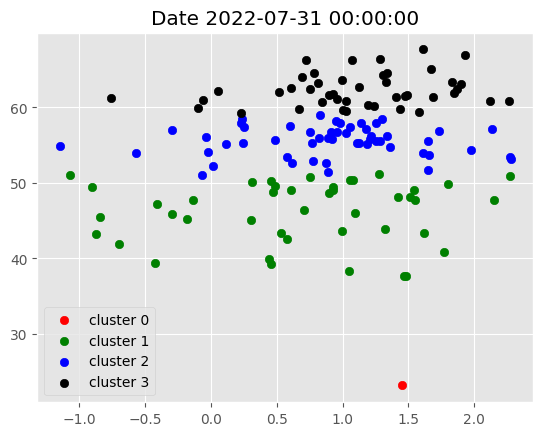

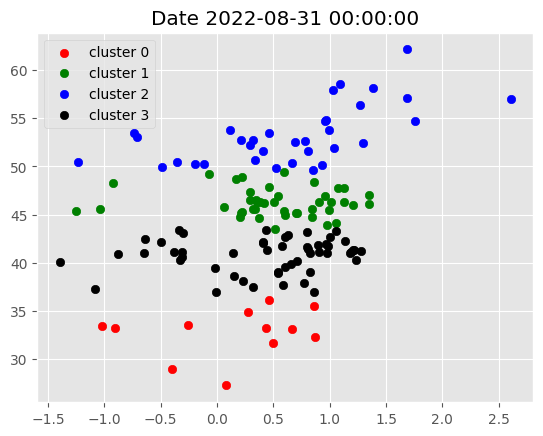

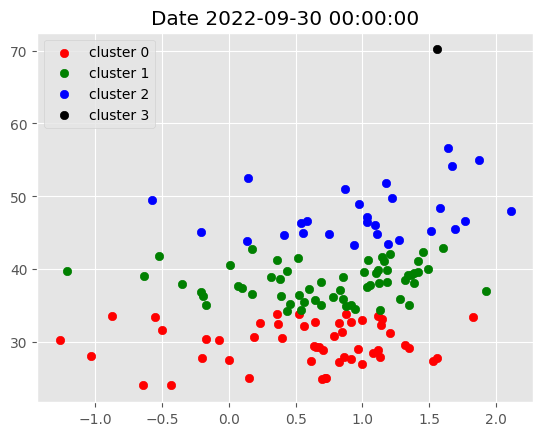

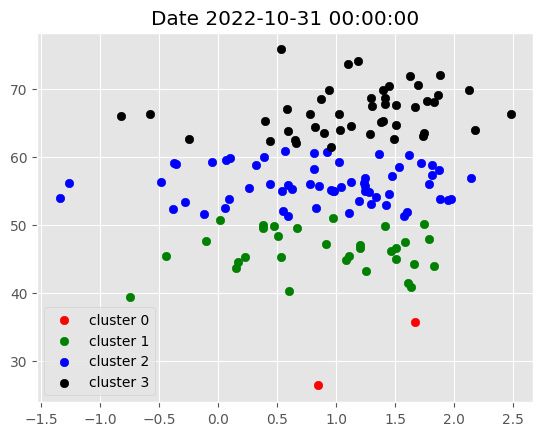

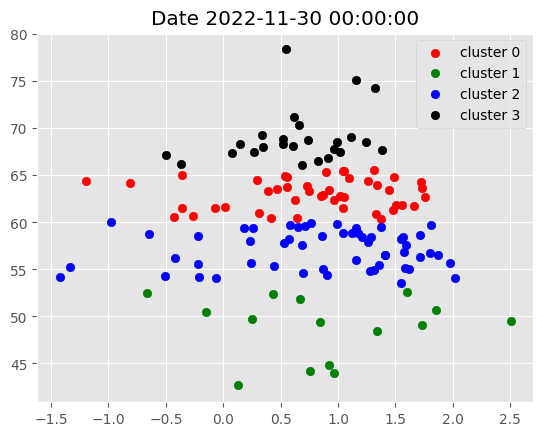

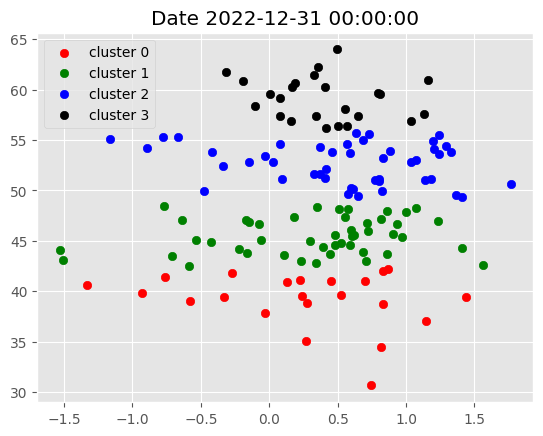

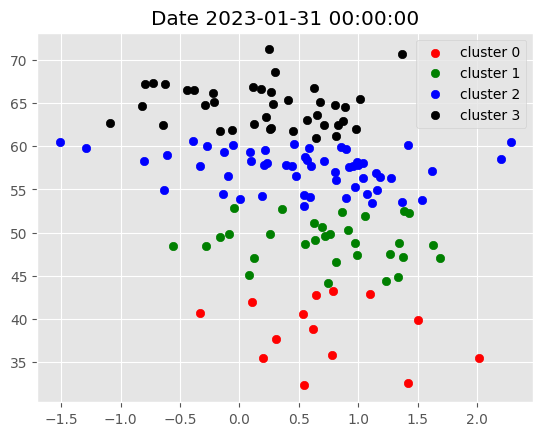

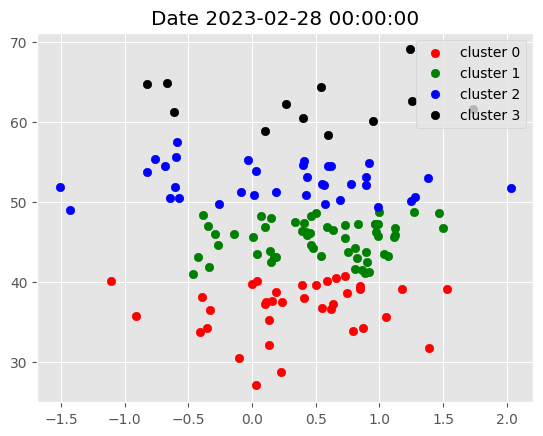

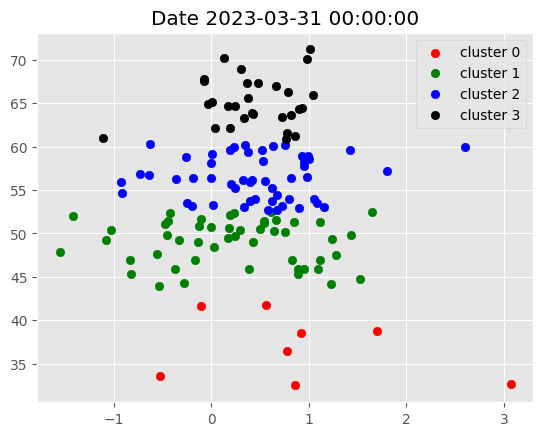

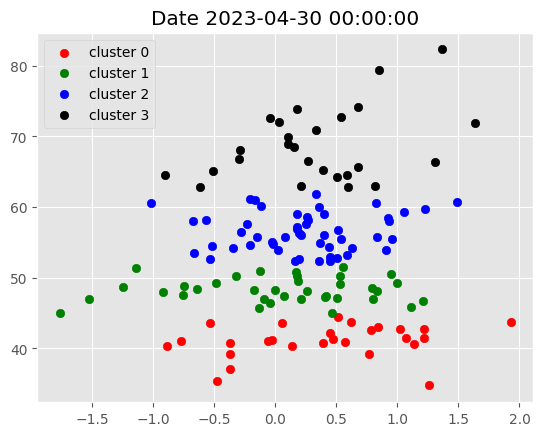

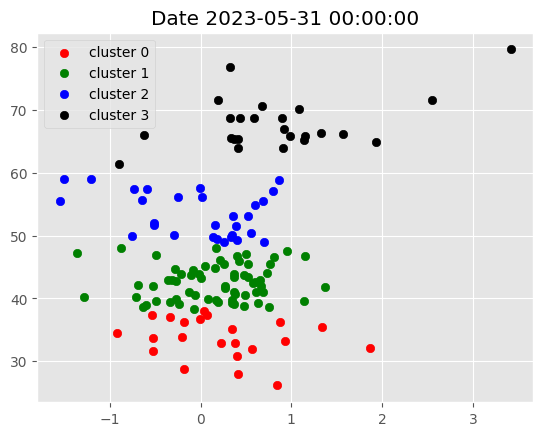

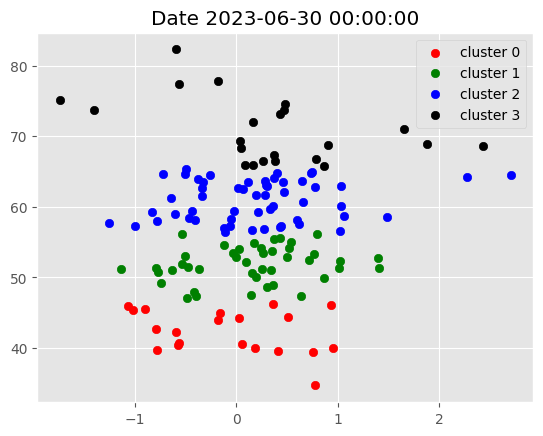

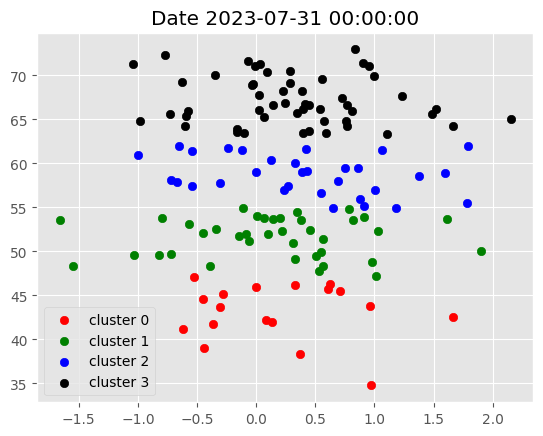

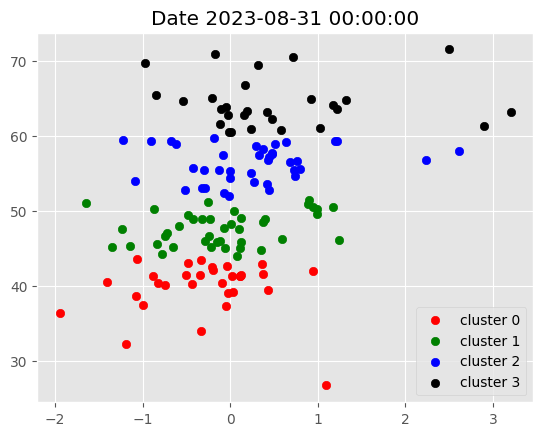

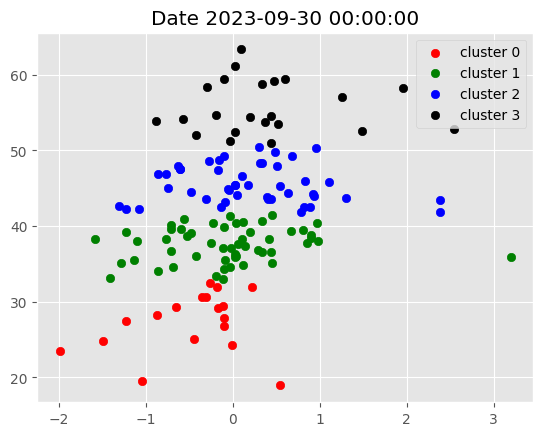

In [99]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():

    g = data.xs(i, level=0)

    plt.title(f'Date {i}')

    plot_clusters(g)

 **For each month select assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe ratio optimizatio**


*   First we will filter only stocks corresponding to the cluster we choose based on our hypothesis.
*   Momentum is persistent and my idea would be that stocks clustered around RSI 70 centroid should continue to outperform in the following month - thus I would select stocks corresponding to cluster 3.



In [100]:
filtered_df = data[data['cluster']==3].copy()
filtered_df

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
date       ticker                                                             
2017-10-31 AAPL   -0.906642  3.689796  3.596048  3.642922         -0.000998   
           ACN    -0.986514  4.885869  4.806508  4.846188         -0.003628   
           ADBE   -0.888269  5.226825  4.951759  5.089292          0.000067   
           AMAT   -0.731906  4.003171  3.880559  3.941865         -0.001723   
           AMZN   -0.886678  4.018957  3.852663  3.935810          0.000032   
...                     ...       ...       ...       ...               ...   
2023-09-30 UNH     0.474824  6.229898  6.143185  6.186541          0.000009   
           VLO     1.260682  5.019385  4.851315  4.935350         -0.000134   
           VRTX    0.029799  5.879295  5.838959  5.859127          0.000037   
           WMT    -0.196381  4.026648  3.991704  4.009176          0.000011   
           XOM     0.601335  4.775304  4.695106  4.735205          0.000026   

                       macd        rsi  return_1m  return_2m  return_3m  \
date       ticker                                                         
2017-10-31 AAPL   -0.039275  69.196775   0.096808   0.015250   0.044955   
           ACN     0.352343  69.365428   0.064180   0.048455   0.037203   
           ADBE    0.612102  70.089317   0.174152   0.062497   0.061392   
           AMAT    0.672597  69.555929   0.083317   0.118331   0.084769   
           AMZN    0.349253  72.442245   0.149717   0.061672   0.038175   
...                     ...        ...        ...        ...        ...   
2023-09-30 UNH     0.527794  59.166059   0.064706   0.001034   0.018236   
           VLO     1.537780  57.079214   0.089915   0.052167   0.067544   
           VRTX    0.027907  52.406728   0.009617  -0.000923  -0.000208   
           WMT     0.399458  54.722509  -0.000677   0.010014   0.012354   
           XOM     1.400623  59.440190   0.046947   0.046139   0.030496   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2017-10-31 AAPL     0.028875   0.038941    0.035228  1.275750 -0.271695   
           ACN      0.028692   0.027398    0.018728  1.199047 -0.166700   
           ADBE     0.045993   0.049515    0.041515  1.115388 -0.330785   
           AMAT     0.057164   0.057916    0.057734  1.257213  0.607021   
           AMZN     0.030123   0.033242    0.028400  1.319371 -0.602686   
...                      ...        ...         ...       ...       ...   
2023-09-30 UNH      0.012613  -0.004017    0.001286  0.584584  0.095517   
           VLO      0.005221   0.015025    0.090018  2.715517 -1.057911   
           VRTX     0.018495   0.022140    0.016337  0.504915 -0.411099   
           WMT      0.017574   0.016553    0.020256  0.740055 -0.261889   
           XOM      0.012838   0.008747    0.027037  1.005967 -1.051370   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2017-10-31 AAPL   -0.591145  0.647782  0.458079        3  
           ACN    -0.328215  0.267791  0.168884        3  
           ADBE   -0.174283 -0.224765 -0.697994        3  
           AMAT    0.701017 -0.358229 -0.669685        3  
           AMZN   -0.458697 -0.593445 -0.153354        3  
...                     ...       ...       ...      ...  
2023-09-30 UNH    -0.325246  0.191581  0.591069        3  
           VLO     1.689084 -0.623056  1.999318        3  
           VRTX   -0.481425  0.057280  0.943566        3  
           WMT    -0.522677 -0.126424  0.642626        3  
           XOM     1.707834 -0.675679 -0.284026        3  

[1915 rows x 19 columns]

In [104]:
filtered_df


ticker       atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
date                                                                          
2017-10-31   AAPL -0.906642  3.689796  3.596048  3.642922         -0.000998   
2017-10-31    ACN -0.986514  4.885869  4.806508  4.846188         -0.003628   
2017-10-31   ADBE -0.888269  5.226825  4.951759  5.089292          0.000067   
2017-10-31   AMAT -0.731906  4.003171  3.880559  3.941865         -0.001723   
2017-10-31   AMZN -0.886678  4.018957  3.852663  3.935810          0.000032   
...           ...       ...       ...       ...       ...               ...   
2023-09-30    UNH  0.474824  6.229898  6.143185  6.186541          0.000009   
2023-09-30    VLO  1.260682  5.019385  4.851315  4.935350         -0.000134   
2023-09-30   VRTX  0.029799  5.879295  5.838959  5.859127          0.000037   
2023-09-30    WMT -0.196381  4.026648  3.991704  4.009176          0.000011   
2023-09-30    XOM  0.601335  4.775304  4.695106  4.735205          0.000026   

                macd        rsi  return_1m  return_2m  return_3m  return_6m  \
date                                                                          
2017-10-31 -0.039275  69.196775   0.096808   0.015250   0.044955   0.028875   
2017-10-31  0.352343  69.365428   0.064180   0.048455   0.037203   0.028692   
2017-10-31  0.612102  70.089317   0.174152   0.062497   0.061392   0.045993   
2017-10-31  0.672597  69.555929   0.083317   0.118331   0.084769   0.057164   
2017-10-31  0.349253  72.442245   0.149717   0.061672   0.038175   0.030123   
...              ...        ...        ...        ...        ...        ...   
2023-09-30  0.527794  59.166059   0.064706   0.001034   0.018236   0.012613   
2023-09-30  1.537780  57.079214   0.089915   0.052167   0.067544   0.005221   
2023-09-30  0.027907  52.406728   0.009617  -0.000923  -0.000208   0.018495   
2023-09-30  0.399458  54.722509  -0.000677   0.010014   0.012354   0.017574   
2023-09-30  1.400623  59.440190   0.046947   0.046139   0.030496   0.012838   

            return_9m  return_12m    Mkt-RF       SMB       HML       RMW  \
date                                                                        
2017-10-31   0.038941    0.035228  1.275750 -0.271695 -0.591145  0.647782   
2017-10-31   0.027398    0.018728  1.199047 -0.166700 -0.328215  0.267791   
2017-10-31   0.049515    0.041515  1.115388 -0.330785 -0.174283 -0.224765   
2017-10-31   0.057916    0.057734  1.257213  0.607021  0.701017 -0.358229   
2017-10-31   0.033242    0.028400  1.319371 -0.602686 -0.458697 -0.593445   
...               ...         ...       ...       ...       ...       ...   
2023-09-30  -0.004017    0.001286  0.584584  0.095517 -0.325246  0.191581   
2023-09-30   0.015025    0.090018  2.715517 -1.057911  1.689084 -0.623056   
2023-09-30   0.022140    0.016337  0.504915 -0.411099 -0.481425  0.057280   
2023-09-30   0.016553    0.020256  0.740055 -0.261889 -0.522677 -0.126424   
2023-09-30   0.008747    0.027037  1.005967 -1.051370  1.707834 -0.675679   

                 CMA  cluster  
date                           
2017-10-31  0.458079        3  
2017-10-31  0.168884        3  
2017-10-31 -0.697994        3  
2017-10-31 -0.669685        3  
2017-10-31 -0.153354        3  
...              ...      ...  
2023-09-30  0.591069        3  
2023-09-30  1.999318        3  
2023-09-30  0.943566        3  
2023-09-30  0.642626        3  
2023-09-30 -0.284026        3  

[1915 rows x 20 columns]

In [109]:
filtered_df

ticker       atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
date                                                                          
2017-11-03   AAPL -0.906642  3.689796  3.596048  3.642922         -0.000998   
2017-11-03    ACN -0.986514  4.885869  4.806508  4.846188         -0.003628   
2017-11-03   ADBE -0.888269  5.226825  4.951759  5.089292          0.000067   
2017-11-03   AMAT -0.731906  4.003171  3.880559  3.941865         -0.001723   
2017-11-03   AMZN -0.886678  4.018957  3.852663  3.935810          0.000032   
...           ...       ...       ...       ...       ...               ...   
2023-10-03    UNH  0.474824  6.229898  6.143185  6.186541          0.000009   
2023-10-03    VLO  1.260682  5.019385  4.851315  4.935350         -0.000134   
2023-10-03   VRTX  0.029799  5.879295  5.838959  5.859127          0.000037   
2023-10-03    WMT -0.196381  4.026648  3.991704  4.009176          0.000011   
2023-10-03    XOM  0.601335  4.775304  4.695106  4.735205          0.000026   

                macd        rsi  return_1m  return_2m  return_3m  return_6m  \
date                                                                          
2017-11-03 -0.039275  69.196775   0.096808   0.015250   0.044955   0.028875   
2017-11-03  0.352343  69.365428   0.064180   0.048455   0.037203   0.028692   
2017-11-03  0.612102  70.089317   0.174152   0.062497   0.061392   0.045993   
2017-11-03  0.672597  69.555929   0.083317   0.118331   0.084769   0.057164   
2017-11-03  0.349253  72.442245   0.149717   0.061672   0.038175   0.030123   
...              ...        ...        ...        ...        ...        ...   
2023-10-03  0.527794  59.166059   0.064706   0.001034   0.018236   0.012613   
2023-10-03  1.537780  57.079214   0.089915   0.052167   0.067544   0.005221   
2023-10-03  0.027907  52.406728   0.009617  -0.000923  -0.000208   0.018495   
2023-10-03  0.399458  54.722509  -0.000677   0.010014   0.012354   0.017574   
2023-10-03  1.400623  59.440190   0.046947   0.046139   0.030496   0.012838   

            return_9m  return_12m    Mkt-RF       SMB       HML       RMW  \
date                                                                        
2017-11-03   0.038941    0.035228  1.275750 -0.271695 -0.591145  0.647782   
2017-11-03   0.027398    0.018728  1.199047 -0.166700 -0.328215  0.267791   
2017-11-03   0.049515    0.041515  1.115388 -0.330785 -0.174283 -0.224765   
2017-11-03   0.057916    0.057734  1.257213  0.607021  0.701017 -0.358229   
2017-11-03   0.033242    0.028400  1.319371 -0.602686 -0.458697 -0.593445   
...               ...         ...       ...       ...       ...       ...   
2023-10-03  -0.004017    0.001286  0.584584  0.095517 -0.325246  0.191581   
2023-10-03   0.015025    0.090018  2.715517 -1.057911  1.689084 -0.623056   
2023-10-03   0.022140    0.016337  0.504915 -0.411099 -0.481425  0.057280   
2023-10-03   0.016553    0.020256  0.740055 -0.261889 -0.522677 -0.126424   
2023-10-03   0.008747    0.027037  1.005967 -1.051370  1.707834 -0.675679   

                 CMA  cluster  
date                           
2017-11-03  0.458079        3  
2017-11-03  0.168884        3  
2017-11-03 -0.697994        3  
2017-11-03 -0.669685        3  
2017-11-03 -0.153354        3  
...              ...      ...  
2023-10-03  0.591069        3  
2023-10-03  1.999318        3  
2023-10-03  0.943566        3  
2023-10-03  0.642626        3  
2023-10-03 -0.284026        3  

[1915 rows x 20 columns]

In [110]:
filtered_df.index = filtered_df.index-pd.DateOffset(2)
filtered_df

ticker       atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
date                                                                          
2017-11-01   AAPL -0.906642  3.689796  3.596048  3.642922         -0.000998   
2017-11-01    ACN -0.986514  4.885869  4.806508  4.846188         -0.003628   
2017-11-01   ADBE -0.888269  5.226825  4.951759  5.089292          0.000067   
2017-11-01   AMAT -0.731906  4.003171  3.880559  3.941865         -0.001723   
2017-11-01   AMZN -0.886678  4.018957  3.852663  3.935810          0.000032   
...           ...       ...       ...       ...       ...               ...   
2023-10-01    UNH  0.474824  6.229898  6.143185  6.186541          0.000009   
2023-10-01    VLO  1.260682  5.019385  4.851315  4.935350         -0.000134   
2023-10-01   VRTX  0.029799  5.879295  5.838959  5.859127          0.000037   
2023-10-01    WMT -0.196381  4.026648  3.991704  4.009176          0.000011   
2023-10-01    XOM  0.601335  4.775304  4.695106  4.735205          0.000026   

                macd        rsi  return_1m  return_2m  return_3m  return_6m  \
date                                                                          
2017-11-01 -0.039275  69.196775   0.096808   0.015250   0.044955   0.028875   
2017-11-01  0.352343  69.365428   0.064180   0.048455   0.037203   0.028692   
2017-11-01  0.612102  70.089317   0.174152   0.062497   0.061392   0.045993   
2017-11-01  0.672597  69.555929   0.083317   0.118331   0.084769   0.057164   
2017-11-01  0.349253  72.442245   0.149717   0.061672   0.038175   0.030123   
...              ...        ...        ...        ...        ...        ...   
2023-10-01  0.527794  59.166059   0.064706   0.001034   0.018236   0.012613   
2023-10-01  1.537780  57.079214   0.089915   0.052167   0.067544   0.005221   
2023-10-01  0.027907  52.406728   0.009617  -0.000923  -0.000208   0.018495   
2023-10-01  0.399458  54.722509  -0.000677   0.010014   0.012354   0.017574   
2023-10-01  1.400623  59.440190   0.046947   0.046139   0.030496   0.012838   

            return_9m  return_12m    Mkt-RF       SMB       HML       RMW  \
date                                                                        
2017-11-01   0.038941    0.035228  1.275750 -0.271695 -0.591145  0.647782   
2017-11-01   0.027398    0.018728  1.199047 -0.166700 -0.328215  0.267791   
2017-11-01   0.049515    0.041515  1.115388 -0.330785 -0.174283 -0.224765   
2017-11-01   0.057916    0.057734  1.257213  0.607021  0.701017 -0.358229   
2017-11-01   0.033242    0.028400  1.319371 -0.602686 -0.458697 -0.593445   
...               ...         ...       ...       ...       ...       ...   
2023-10-01  -0.004017    0.001286  0.584584  0.095517 -0.325246  0.191581   
2023-10-01   0.015025    0.090018  2.715517 -1.057911  1.689084 -0.623056   
2023-10-01   0.022140    0.016337  0.504915 -0.411099 -0.481425  0.057280   
2023-10-01   0.016553    0.020256  0.740055 -0.261889 -0.522677 -0.126424   
2023-10-01   0.008747    0.027037  1.005967 -1.051370  1.707834 -0.675679   

                 CMA  cluster  
date                           
2017-11-01  0.458079        3  
2017-11-01  0.168884        3  
2017-11-01 -0.697994        3  
2017-11-01 -0.669685        3  
2017-11-01 -0.153354        3  
...              ...      ...  
2023-10-01  0.591069        3  
2023-10-01  1.999318        3  
2023-10-01  0.943566        3  
2023-10-01  0.642626        3  
2023-10-01 -0.284026        3  

[1915 rows x 20 columns]

In [111]:
filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])
filtered_df

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
date       ticker                                                             
2017-11-01 AAPL   -0.906642  3.689796  3.596048  3.642922         -0.000998   
           ACN    -0.986514  4.885869  4.806508  4.846188         -0.003628   
           ADBE   -0.888269  5.226825  4.951759  5.089292          0.000067   
           AMAT   -0.731906  4.003171  3.880559  3.941865         -0.001723   
           AMZN   -0.886678  4.018957  3.852663  3.935810          0.000032   
...                     ...       ...       ...       ...               ...   
2023-10-01 UNH     0.474824  6.229898  6.143185  6.186541          0.000009   
           VLO     1.260682  5.019385  4.851315  4.935350         -0.000134   
           VRTX    0.029799  5.879295  5.838959  5.859127          0.000037   
           WMT    -0.196381  4.026648  3.991704  4.009176          0.000011   
           XOM     0.601335  4.775304  4.695106  4.735205          0.000026   

                       macd        rsi  return_1m  return_2m  return_3m  \
date       ticker                                                         
2017-11-01 AAPL   -0.039275  69.196775   0.096808   0.015250   0.044955   
           ACN     0.352343  69.365428   0.064180   0.048455   0.037203   
           ADBE    0.612102  70.089317   0.174152   0.062497   0.061392   
           AMAT    0.672597  69.555929   0.083317   0.118331   0.084769   
           AMZN    0.349253  72.442245   0.149717   0.061672   0.038175   
...                     ...        ...        ...        ...        ...   
2023-10-01 UNH     0.527794  59.166059   0.064706   0.001034   0.018236   
           VLO     1.537780  57.079214   0.089915   0.052167   0.067544   
           VRTX    0.027907  52.406728   0.009617  -0.000923  -0.000208   
           WMT     0.399458  54.722509  -0.000677   0.010014   0.012354   
           XOM     1.400623  59.440190   0.046947   0.046139   0.030496   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2017-11-01 AAPL     0.028875   0.038941    0.035228  1.275750 -0.271695   
           ACN      0.028692   0.027398    0.018728  1.199047 -0.166700   
           ADBE     0.045993   0.049515    0.041515  1.115388 -0.330785   
           AMAT     0.057164   0.057916    0.057734  1.257213  0.607021   
           AMZN     0.030123   0.033242    0.028400  1.319371 -0.602686   
...                      ...        ...         ...       ...       ...   
2023-10-01 UNH      0.012613  -0.004017    0.001286  0.584584  0.095517   
           VLO      0.005221   0.015025    0.090018  2.715517 -1.057911   
           VRTX     0.018495   0.022140    0.016337  0.504915 -0.411099   
           WMT      0.017574   0.016553    0.020256  0.740055 -0.261889   
           XOM      0.012838   0.008747    0.027037  1.005967 -1.051370   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2017-11-01 AAPL   -0.591145  0.647782  0.458079        3  
           ACN    -0.328215  0.267791  0.168884        3  
           ADBE   -0.174283 -0.224765 -0.697994        3  
           AMAT    0.701017 -0.358229 -0.669685        3  
           AMZN   -0.458697 -0.593445 -0.153354        3  
...                     ...       ...       ...      ...  
2023-10-01 UNH    -0.325246  0.191581  0.591069        3  
           VLO     1.689084 -0.623056  1.999318        3  
           VRTX   -0.481425  0.057280  0.943566        3  
           WMT    -0.522677 -0.126424  0.642626        3  
           XOM     1.707834 -0.675679 -0.284026        3  

[1915 rows x 19 columns]

In [115]:
dates = filtered_df.index.get_level_values('date').unique().tolist()


In [117]:
fixed_dates = {}

for d in dates:

    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()

fixed_dates

{'2017-11-01': ['AAPL',
  'ACN',
  'ADBE',
  'AMAT',
  'AMZN',
  'AVGO',
  'AXP',
  'BAC',
  'CAT',
  'COP',
  'CRM',
  'CTSH',
  'DE',
  'DHR',
  'DLTR',
  'ELV',
  'EOG',
  'GOOG',
  'GOOGL',
  'INTC',
  'ISRG',
  'JPM',
  'MA',
  'MAR',
  'MCD',
  'MET',
  'META',
  'MMM',
  'MSFT',
  'MU',
  'NEE',
  'NVDA',
  'NXPI',
  'ORCL',
  'PYPL',
  'SHW',
  'STZ',
  'TXN',
  'UNH',
  'V',
  'VLO',
  'WMT',
  'XOM'],
 '2017-12-01': ['AMZN',
  'AXP',
  'AZO',
  'BA',
  'BAC',
  'BRK-B',
  'CAT',
  'COST',
  'CSCO',
  'DE',
  'DLTR',
  'ELV',
  'HD',
  'HON',
  'ILMN',
  'JPM',
  'KR',
  'LUV',
  'MAR',
  'MMM',
  'NKE',
  'ORLY',
  'OXY',
  'SCHW',
  'UNH',
  'UNP',
  'VLO',
  'VZ',
  'WMT'],
 '2018-01-01': ['ACN',
  'BA',
  'BAC',
  'CAT',
  'CSCO',
  'CVX',
  'DAL',
  'DE',
  'DG',
  'EOG',
  'FCX',
  'FDX',
  'HAL',
  'HD',
  'KR',
  'LOW',
  'LUV',
  'MAR',
  'OXY',
  'PEP',
  'PXD',
  'RTX',
  'STZ',
  'T',
  'TXN',
  'UAL',
  'UNP',
  'VLO',
  'VZ',
  'WMT',
  'WYNN'],
 '2018-02-01': ['

**Define portfolio optimization function**

*   We will define a function which optimizes portfolio weights using PyPortfolioOpt package and EfficientFrontier optimizer to maximize the sharpe ratio.
*   To optimize the weights of a given portfolio we would need to supply last 1 year prices to the function.
*   Apply signle stock weight bounds constraint for diversification (minimum half of equaly weight and maximum 10% of portfolio).






In [119]:
!pip install PyPortfolioOpt
import pypfopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.4 MB/s eta 0:00:00


In [120]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [121]:
def optimize_weights(prices, lower_bound=0):

    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)

    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)

    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')

    weights = ef.max_sharpe()

    return ef.clean_weights()


**Download Fresh Daily Prices Data only for short listed stocks.**

In [124]:
stocks = data.index.get_level_values('ticker').unique().tolist()


In [125]:
new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

new_df

[*********************100%%**********************]  154 of 154 completed


Price       Adj Close                                                 \
Ticker            AAL        AAPL        ABBV        ABT         ACN   
Date                                                                   
2016-10-31  39.134327   26.248028   40.620975  34.463531  103.970650   
2016-11-01  38.363205   25.774111   41.108894  34.296661  103.881210   
2016-11-02  38.276459   25.797230   41.356491  33.989262  106.090508   
2016-11-03  38.054199   25.520718   40.701080  33.708210  104.605698   
2016-11-04  38.402077   25.290672   40.810314  34.331795  104.856178   
...               ...         ...         ...        ...         ...   
2023-09-25  12.910000  175.624237  151.668289  96.467384  314.532135   
2023-09-26  12.700000  171.514893  150.942551  95.240135  308.201630   
2023-09-27  12.610000  169.988846  150.177597  94.547333  311.942413   
2023-09-28  12.920000  170.248184  149.314560  97.110695  298.437927   
2023-09-29  12.810000  170.766846  146.186050  95.853752  304.728760   

Price                                                                  ...  \
Ticker            ADBE         ADP        ADSK        AIG        AMAT  ...   
Date                                                                   ...   
2016-10-31  107.510002   74.686058   72.279999  50.977718   26.654839  ...   
2016-11-01  106.870003   74.565971   70.099998  50.134972   26.489840  ...   
2016-11-02  105.889999   77.191032   68.680000  50.027550   26.205692  ...   
2016-11-03  107.169998   76.633438   67.610001  48.044640   25.912386  ...   
2016-11-04  106.199997   76.418983   69.440002  47.408440   25.866552  ...   
...                ...         ...         ...        ...         ...  ...   
2023-09-25  511.600006  238.573792  205.669998  61.795918  136.066559  ...   
2023-09-26  506.299988  235.810547  201.660004  60.930592  133.566162  ...   
2023-09-27  502.600006  241.168076  202.279999  60.681938  134.542404  ...   
2023-09-28  504.670013  241.843964  207.889999  60.950485  137.690292  ...   
2023-09-29  509.899994  239.130417  206.910004  60.274143  137.919418  ...   

Price         Volume                                                           \
Ticker             V      VLO     VRTX        VZ       WBA      WDC       WFC   
Date                                                                            
2016-10-31  10024000  4969500  1928200  12459400   4662100  3363200  20115900   
2016-11-01  10881500  7816800  2458200  13229400   5130800  3821100  20020200   
2016-11-02   9170900  7317600  2580400  16488200   9783100  4216200  19566600   
2016-11-03   7563100  3855900  2371000  12605100   4586500  3192600  14982700   
2016-11-04   7588100  3729900  1902100  14410200   7023900  2705600  27391600   
...              ...      ...      ...       ...       ...      ...       ...   
2023-09-25   5921600  3241900   698100  17616900   6891000  2685900  10624000   
2023-09-26   6193200  4936800   633600  18841600   7570500  3571100  15219400   
2023-09-27   6006700  3644000   860600  22083500  10182900  2547800  11815500   
2023-09-28   4203900  3587300   578900  18772100   7291500  3282000  12454600   
2023-09-29   6044200  4302200   896800  19759400  25659100  2512000  13119100   

Price                                    
Ticker           WMT     WYNN       XOM  
Date                                     
2016-10-31  19167000  1341600  16663800  
2016-11-01  26515800  3722300  13050600  
2016-11-02  22935900  2542400  11226100  
2016-11-03  20411700  9050400   8836500  
2016-11-04  21786300  3223800  13877100  
...              ...      ...       ...  
2023-09-25  10459500  1387800  11316000  
2023-09-26  14435700  1454000  11805400  
2023-09-27  15711000  2050000  23976200  
2023-09-28  11617200  1290400  16808100  
2023-09-29  18842400  1326800  18810700  

[1740 rows x 924 columns]

**Calculate daily returns for each stock which could land up in our portfolio.**

In [126]:
returns_dataframe = np.log(new_df['Adj Close']).diff()
returns_dataframe

Ticker           AAL      AAPL      ABBV       ABT       ACN      ADBE  \
Date                                                                     
2016-10-31       NaN       NaN       NaN       NaN       NaN       NaN   
2016-11-01 -0.019901 -0.018220  0.011940 -0.004854 -0.000861 -0.005971   
2016-11-02 -0.002264  0.000897  0.006005 -0.009003  0.021045 -0.009212   
2016-11-03 -0.005824 -0.010777 -0.015975 -0.008303 -0.014095  0.012016   
2016-11-04  0.009100 -0.009055  0.002680  0.018330  0.002392 -0.009092   
...              ...       ...       ...       ...       ...       ...   
2023-09-25  0.000775  0.007353  0.012427 -0.006952  0.002843 -0.002538   
2023-09-26 -0.016400 -0.023677 -0.004797 -0.012804 -0.020332 -0.010414   
2023-09-27 -0.007112 -0.008937 -0.005081 -0.007301  0.012064 -0.007335   
2023-09-28  0.024286  0.001524 -0.005763  0.026751 -0.044257  0.004110   
2023-09-29 -0.008550  0.003042 -0.021175 -0.013028  0.020860  0.010310   

Ticker           ADP      ADSK       AIG      AMAT  ...         V       VLO  \
Date                                                ...                       
2016-10-31       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2016-11-01 -0.001609 -0.030625 -0.016670 -0.006209  ... -0.010845  0.004211   
2016-11-02  0.034599 -0.020465 -0.002145 -0.010785  ... -0.012824 -0.017979   
2016-11-03 -0.007250 -0.015702 -0.040443 -0.011256  ...  0.000869 -0.009803   
2016-11-04 -0.002802  0.026707 -0.013330 -0.001770  ... -0.003602  0.000173   
...              ...       ...       ...       ...  ...       ...       ...   
2023-09-25  0.002795  0.007957  0.008892  0.003080  ... -0.007344  0.008704   
2023-09-26 -0.011650 -0.019690 -0.014102 -0.018547  ... -0.016026 -0.034433   
2023-09-27  0.022465  0.003070 -0.004089  0.007282  ... -0.000653  0.016601   
2023-09-28  0.002799  0.027356  0.004416  0.023127  ...  0.009368  0.022190   
2023-09-29 -0.011284 -0.004725 -0.011159  0.001663  ... -0.007148 -0.037874   

Ticker          VRTX        VZ       WBA       WDC       WFC       WMT  \
Date                                                                     
2016-10-31       NaN       NaN       NaN       NaN       NaN       NaN   
2016-11-01  0.026280 -0.009190 -0.003269 -0.020747 -0.000435 -0.010336   
2016-11-02  0.001540 -0.015222 -0.006448 -0.036290 -0.008145  0.002162   
2016-11-03 -0.003982 -0.001492 -0.014135 -0.001088  0.002208  0.002589   
2016-11-04  0.016215  0.004471 -0.005338 -0.002179 -0.016456 -0.006773   
...              ...       ...       ...       ...       ...       ...   
2023-09-25  0.003256 -0.003612  0.010363 -0.011587  0.007972  0.004425   
2023-09-26  0.002904 -0.005140 -0.009889 -0.007875 -0.022139 -0.003502   
2023-09-27 -0.005817 -0.018046 -0.005219  0.006529  0.005153 -0.004812   
2023-09-28  0.008118  0.004619 -0.005725  0.027447  0.001223  0.005058   
2023-09-29 -0.013596 -0.004310  0.062143 -0.003719 -0.001223 -0.016188   

Ticker          WYNN       XOM  
Date                            
2016-10-31       NaN       NaN  
2016-11-01  0.038183  0.003953  
2016-11-02 -0.017561 -0.002394  
2016-11-03 -0.097769  0.002514  
2016-11-04  0.005810 -0.001076  
...              ...       ...  
2023-09-25 -0.009989  0.011161  
2023-09-26  0.000331  0.001547  
2023-09-27  0.016732  0.032039  
2023-09-28 -0.009151 -0.006092  
2023-09-29  0.011318 -0.015946  

[1740 rows x 154 columns]



*    loop over each month start, select the stocks for the month and calculate their weights for the next month.
*    If the maximum sharpe ratio optimization fails for a given month, apply equally-weighted weights.
*   Calculated each day portfolio return.






In [127]:
portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():

    try:

        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

        cols = fixed_dates[start_date]

        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')

        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')

        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]

        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))

            weights = pd.DataFrame(weights, index=pd.Series(0))

            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')

        if success==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T

        temp_df = returns_dataframe[start_date:end_date]

        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True)\
                   .reset_index().set_index(['Date', 'index']).unstack().stack()

        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)

    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

Max Sharpe Optimization failed for 2018-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2018-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-01-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-03-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-09-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-10-01, Continuing with Equal-Weights
"None of ['index'] are in the columns"


Strategy Return
date                       
2017-11-01         0.001361
2017-11-02         0.002909
2017-11-03         0.006310
2017-11-06         0.003008
2017-11-07         0.002704
...                     ...
2023-09-25         0.003641
2023-09-26        -0.011470
2023-09-27         0.005189
2023-09-28         0.007977
2023-09-29        -0.007698

[1487 rows x 1 columns]

In [128]:
spy = yf.download(tickers='SPY',
                  start='2015-01-01',
                  end=dt.date.today())

spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)

portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df

[*********************100%%**********************]  1 of 1 completed


Strategy Return  SPY Buy&Hold
2017-11-01         0.001361      0.001321
2017-11-02         0.002909      0.000388
2017-11-03         0.006310      0.003333
2017-11-06         0.003008      0.001547
2017-11-07         0.002704     -0.000696
...                     ...           ...
2023-09-25         0.003641      0.004196
2023-09-26        -0.011470     -0.014800
2023-09-27         0.005189      0.000399
2023-09-28         0.007977      0.005781
2023-09-29        -0.007698     -0.002430

[1487 rows x 2 columns]

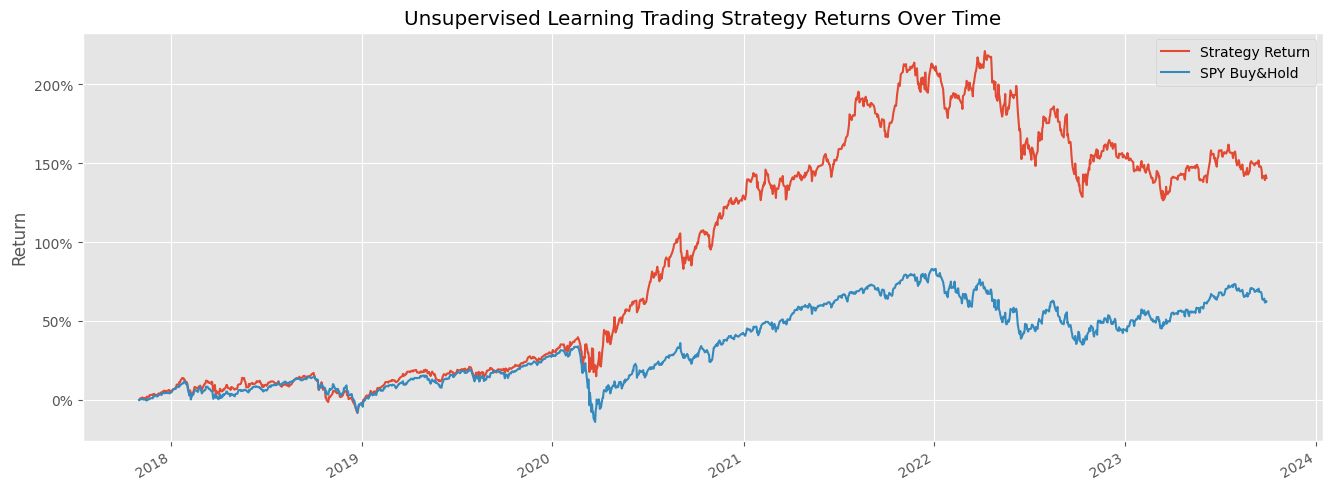

In [129]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()
